<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 (Problem 1) - Sentiment Analysis Model  (Group)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [2]:
# Import the Required Packages

from spacy_langdetect import LanguageDetector
from googletrans import Translator
from langdetect import detect
from textblob import TextBlob
import string
import spacy
import numpy as np
import re
import pandas as pd
import os
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, Dropout, LSTM, GRU, Flatten, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
import nltk
from nltk.corpus import stopwords
%matplotlib inline


## Step 1 – Data Loading and Processing (Group)

### 1.1 Data Loading

In [3]:
## Open and read file

base_dir='C:/Users/kc/Desktop/YEAR 2 SEM 1/DL/Assignment 2'
filename = "disneyplus_reviews.csv"
path_to_file = os.path.join(base_dir, filename)
df = pd.read_csv('C:/Users/kc/Desktop/YEAR 2 SEM 1/DL/Assignment 2/disneyplus_reviews.csv')
print(df.shape)
print(df.info())

(40000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              40000 non-null  object
 1   userName              40000 non-null  object
 2   userImage             40000 non-null  object
 3   content               40000 non-null  object
 4   score                 40000 non-null  int64 
 5   thumbsUpCount         40000 non-null  int64 
 6   reviewCreatedVersion  33023 non-null  object
 7   at                    40000 non-null  object
 8   replyContent          52 non-null     object
 9   repliedAt             52 non-null     object
dtypes: int64(2), object(8)
memory usage: 3.1+ MB
None


In [4]:
# Ensuring each value has 8000 reviews
# Balanced dataset ensures machine learns fairly and will not be biased to any values

df['score'].value_counts()

1    8000
2    8000
3    8000
4    8000
5    8000
Name: score, dtype: int64

In [5]:
## Converting emojis & removing emoticons

# Step 1: Replace emoji with relevant word it represents
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace("_","").replace(":"," ").replace(",","").split("_")))
    return text

with open('C:/Users/kc/Desktop/YEAR 2 SEM 1/DL/Assignment 2/Problem 1/Emoticon_Dict.p', 'rb') as fp:
    Emoticon_Dict = pickle.load(fp)

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in Emoticon_Dict) + u')')
    return emoticon_pattern.sub(r'', text)

In [6]:
# Converting df reviews to list and applying the functions

# Removing emoticons because they are uncommon and could confuse the machine (low sample size)
# Converting emojis because they are common and will help with the context and prediction of the review

reviews_list = df['content'].tolist()
reviews_list_c = []
for review in reviews_list:
    processing = convert_emojis(review)
    final = remove_emoticons(processing)
    reviews_list_c.append(final)


In [7]:
# Testing if the functions are working as intended

test_emoji  = "wow😀hi"
test_emoji = convert_emojis(test_emoji)

test_emoticon = "This is a :^)hi"
test_emoticon = remove_emoticons(test_emoticon)

print(test_emoji)
print(test_emoticon)

wow grinningface hi
This is a hi


In [8]:
# Ensuring reviews_list_c is in the correct shape and ensuring that all emojis are converted

print(len(reviews_list_c))
for review in reviews_list_c:
    print(review)

40000
Had no problems up until about 4 months ago. No matter what solutions I try from their help desk I can't resolve the error code 83. My nearly decade old ps4 runs it no problem. It's infuriating that their only solution it seems is to use another device. I got a brand new phone 2 days ago and have not been able to log in because of the same issue. So when will they admit their app is failing on their end and just fix it??
I can't launch the application after the update, cannot use a service which I am paying for. Back then everything was on Netflix and it WORKED.
App never works properly and lags like crazy don't reccoment
Keeps crashing or freezing during downloads.
I do want to like it, but the app refuses to load since the 3rd episode of obi. It's the only streaming app that doesn't work on my devices so respectfully disney, please stop just assuming it's the wifi connection. It's not. It's your app specifically. Would love to come back when it works though. I remember the earl

Stop promoting homosexuality we are not going to allow it in our countries  facewithsymbolsonmouth  facewithsymbolsonmouth  facewithsymbolsonmouth  facewithsymbolsonmouth  facewithsymbolsonmouth  angryface  angryface  angryface  angryface  angryface  angryface 
I will no longer pay for an app that can't play the next episode in a series. Every other app in existence is capable. You would think a monopoly on the movie industry could do better.
Casting uninterrupted is now completely impossible, if watching a series the next episode will not load. If the first episode loads at all. The app keeps crashing. Useless considering how much it costs  confusedface 
Not working. Didn't work with my pixel 3. Upgraded to pixel 6 pro and now the latest version of the app is not working on there  personfacepalming  darkskintone ‍ malesign ️
we don't need lgbt for our kids
Is there a zero stars choice? App won't open on any device. Good for anyone with the secret to entry. I guess Disney doesn't need 

Normally it is great but I can't get on it . It just won't load. And I'm paying for this app.
I'm not a Republican nor Democrat and never voted either party. But at this point, it's clear Hollywood and media are in bed with the DNC and Communist China, and Woke-ism ideology and I'm sick of it! Please quit allowing Hollywood and LGBTQRSTUVWXYZ people to hijack what we watch and want to watch! You will go broke and continue to lose customers. None of us care who you love or what you do with your genitals in your own home. Quit indoctrinating children!
Constantly having issues with the app not loading, always has a message saying error try again later. I just want to be able to watch my shows without having to constantly delete and reinstall the app.
won't run video
This app is horrible it forces me to reconnect my TV and relogin EVERY SINGLE TIME i use it.. disney plus is absolute trash app with trash content if they didn't have star wars nobody would us this app they obviously don't car

Worst streaming app. Every other app works on my phone except this one, and for that I'm unsubscribing.
Go woke go broke
Can't watch downloaded movies.
Play stpd games..win stpd prizes
Absolutely awful update. Can't get past the loading screen, just the logo and rotating circle. Crazy bad
The content is rubbish old films and TV series. Some new stuff but nothing worth the monthly fee.
I love this app because it had all the movies and shows I grew up on but when it comes to downloading it takes to long I tried to download encanto for my son and it took 3 hours just to have only downloaded 2%... This app should really fix this issue because I want to enjoy the movies and shows with my family
The app just won't load. I like disney plus but this variant of the app is terrible. It's been like this for longer than I'd expect for a big name like disney.
Appalling as all I get is error 73 all I want to do is change the age on primary account I left a review but it appears to have been deleted 

it wont let me sign up i keep trying but it wont work  so JUST WORK ALREADY STUPID DISNEY +  UGH >>>>>:::::::((((((((
Error code 42 no matter what I do.
Only HD? No HDR 10? No Dodby Atmos? Why? Only for IPhone?
This app is just not work well. For crying out loud! I takes forever to load and then it keeps telling me my wifi is not online every 2 min. I have other movie apps with absolutely no problems. This app needs to be fixed or I'm cancelling my subscription. I was looking forward to watching good wholesome movies from Disney but looks like it just isn't going to happen. Get it fixed or you will lose my business. I would Not recommend this Disney App. The frustration isn't worth my time!
Impossible to make a payment for through
It said #1 top free entertainment, lies and false advertising, pedoland should be prosecuted
What is going on???? I can't connect or even access my account on my tablet! I've tried everything from restarting my tablet, to unistalling the app, and I'm still ge

This app is sht on xbox never works error 39
What is with this app uses to much data and just keeps giving errors i deserve a credit at this rate
Constantly have to re-download because the app stops working. Shows will play without video and sometimes fail altogether. Downloads also delete themselves and fail to work. Bad app.
Very poorly made app constant crashes
It crashes a lot, and then if it doesn't play video anymore I have to install and reinstall all over again.
The app crashes a lot, I can't watch movies on my cell phone. lousy platform
Needs improvement.
Does not work
I'm Also having problems to with it been going on for about a week now Idk what's going on but I won't continue to pay services every Month if issues are Continuing Canceling out.
The app almost never loads, each time I want to watch something I have to uninstall and download again... It kind sucks.
Why pay
this app no longer opens on my phone
アプリが重いのか、全然動画が再生できません。 テレビなんか、一切再生できません。キャストしても全然スムーズに見れなくてストレス。 家で見れ

Gran disgusto de muchos... Los doblajes originales de películas que nunca debieron cambiar... Eso es tan importante en mi opinión que ha costado 3 estrellas... Ojalá que algún día traigan de vuelta esas mágicas voces
Why is paying with Google the only option. Have to go online to pay. I don't want to add payment method to Google.
I cannot play a full movie on this app. Was buffering or doesn't load the options to pick movies. The inconsistency of this app drives me crazy. I love Disney movies but this app needs to be fixed.
Never ending loading screen not cool will be dropping Disney
No Matilda??!!
Well, it won't load? And I'd like to be able to give a thumbs down to some things
Still waiting for new episodes to the owl house season 2, 4 episodes already have aired!!
meh!
I was expecting more but Disney has ruined most if the decent franchises. Nothing on their channel is any good. Now they are doing Kenobi, and as a story it sucks.
Constantly not working lately just get error codes, h

Too many bugs...
Doesn't load videos......
So many bugs
Temperamental app. Most times I'm not able to load certain movies or I get an error referring me to the Help page. I know it's not my internet connection because all my other apps work fine. Only Disney+ has issues, especially when you're trying to watch feature films. Ugh.
After recharge can not see latest episode
each time i open the app it is just black please fix this
Tava bom até agora. O app está dando um trabalho horrível pra abrir no smartphone.
For the first year or two everything was great. Now, whenever I try to use subtitles no words can be made out! It's all a rectangle of black.
Good app with a great selection of content, but the most recent update seemed to introduce a lot of bugs. I regularly have issues opening the app now (just freezes on a gray screen and never opens. If I'm watching something and quickly cwhange to another app, when I come back the video is frozen for 20 seconds or so before it starts respondin

App stopped working now it won't load at all
Had since day one. Didnt work day one to like 30 very often. Hasnt improved much since. On smart tv is crashes most of the time part way into a movie or never stops buffering and says server issues. Just expected disney to have the means to run stream service without so many bugs.
Has a lot of good quality shows and movies but it was working fine on my phone then 2 hours later it stopped working and hasn't worked since
I love Disney plus but the app no longer works on my phone and refuses to load when I try to open the app. It gives me the gradient background of disney+ but doesn't show me the logo and never loads in. I have tried uninstalling and reinstalling along with clearing cache. Nothing. Please fix!
I subscribed to this app. for the Marvel movies and shows. But notice that the premier movies you have to purchase separately . I must say it was disappointed to realize this .I won't renew my subscription after the month. I'll stick to m

I will soon unsubscribe this apps, not gonna pay for something that keep crashing this ridiculous.. maybe I should go get HBO instead of this Disney plus.. I really don't get it why fix something that is not broken, fix it or bye bye...
It's not working on my TV in the lounge an not impressed have Uninstaller an reinstalled but still not playing the app on my TV you guys need to fix this issue as only have this app on 3 of my devices
Add more bluey episodes
Been locked out for a week! Can't remember my password! Trying to get back in is a real pain in the butt!
Sinds ik een 4K tv heb, sottert de stream om de haverklap. Speedtest geeft geen problemen aan bij de internetverbinding en andere streamingapps werken ook prefect. Heel jammer. Als dit blijft duren, dan is dit zijn geld niet langer waard.
Got Disney +, on the VERY next month the price went up $1.00 per month. That sounds a lot like bait and switch!  grimacingface  No thank you Disney, no wonder your people get BIG bonus's.
I thi

have wonderful movies but unable to watch on my smart TV... I always have to screen cast
The app never opens on my galaxy s20 ultra just sits and loads never quits really annoying
This has lots of bugs but its ok pls download to see what i mean.....
Honestly, the options you get from series to movies is great. But the TV app could use some love. I mean you can't even change the language. I have to turn off my TV, open the movie on my phone, choose the language, pause the movie, close the app on my phone, turn on the TV then I can resume the movie on the tv...
Pay less
App stopped working 3 days ago. Audio and captions are perfect, just no picture. Tried uninstalling, gave it almost 2 days, and still nothing. Please help.
There should be much be fixed. Firsr of all many options are missing like: when you want to go to other apps or just homepage it closes the movie in stead of minimising it. Also, I live in belgium and the only languages are English and french while my kids are understa

Aw31
Thus far, I'm truly enjoying the honeymoon stage lol. For lack of a better word. And I'll continue to enjoy as long as things stay up to date and not repeating itself after the first moth 2 month and a half.. I will of course be updating my information as I go along with what Disney has to offer.
Great movies and series, just too bad that I can't install the app on TV. I have to go online and stream movies; it's, of course, an online streaming service, but other streaming services are making it easier to download their app on TV
The content is mid Honestly the content is stuff I already watched over the years and its mind blowingly easy to just pirate some of the exclusive shows so honestly netflix better
The movies or shows stop loading then the app crashes.
This app is okay but it never loads I can never watch any thing it is so frustrating because I have to keep deleting and downloading it
good
It's ok
its an amzing app but it takes forever to downlaod on my lap top took 45 min

I can't change the episodes while on groupwatch. Make it easier
Short
would like a free trial before l sign up
The app doesn't load on a regular basis. You would expect better from Disney.
Content and interface is getting better. Needs a preview screen when flipping through movies and series. ALSO needs automatic next episode feature.
Only 3 star's because the content is good but I'm sick of the app deciding it won't open and the only way to get it back is to uninstall then reinstall which is very frustrating. Can you please sort out the app!!! I am absolutely sick of having to uninstall then reinstall because it won't connect.
I really loved this app for the first few months which is approx the time it took me to re-watch the major of avenger movies and also the Winter Soldier tv series which was good but not nearly enough to stave off the need for new movies. Then when a new movie finally gets released Disney rewards you by not letting you watch it unless you pay again. Meaning you p

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




It has every show/movie that I like but, 1 small gripe that is wrong is that you have to pay even when you bought the subscription to watch a new premium movie.
They raised the price a couple months ago even if you were a current customer
Honsetly, It's A Great App, Yet It Could Be Better.
I love the movies
I love Disney but I want to be able to watch all kinds of movies like Raya and the last dragon
I want more movies lol.
For some reason the Picture-in-Picture doesn't work on my S20, and yes, I'm sure I turned it on.
I love it so much. Had a couple of problems but assume its because i watch it via SKYQ but love it so much. Only 4 stars because i still hate that i pay for it but still need to pay for exclusive movies. Too much like Amazon Prime. Otherwise perfect x
Just a great all round App and streaming venture
Fantastic  smilingfacewithsmilingeyes 
Great app, Would have given 5☆ if you could take screenshots of content.
Very nice app wish there was more shows. Need more shower and

Great app with star coming to Disney + so much content
I love watching disney plus on my phone but sometimes when the show is about to end it buffers. Makes it very irritating.
Great app and good selection of movies.... im sure with time more will be added... overall I recommend it to everyone as it is well worth the cost.
Okay
Overall smooth and easy to use. Could be easier to find shows to watch.
Doesn't always go back to the point you finished watching from. Otherwise, great service.
Awesome, and now even better with Star compliment! Love Movies from the 80s and the 90s so its amazing to have the oppertunity for them as well!
Since I have signed up for this app they have fixed the bugs that used to bother me. Great catalog and quality.
I like it a lot. I only miss the Spider-Man movies. I know that Sony doesn't want their movies on Disney+ but that's the only problem i have, the other movies and all the Star movies are great!
It's got some nice titles. Hope they bring more classics


Nice collection of movies and shows for subscribers only.
App works great
Awesome thanks  thumbsup  grinningface .
Dr phil
Love it!! Love all the movies from my childhood!
My entire family enjoys watching disney movies. I would give it five stars if there was a way to put a lock on the screen in the app for my younger kids. Kinda like the one netflix has.
I love it but frozen is in Italian too but it's not there and that's the same with others I'm in Denmark and they don't have many things in Italian which is annoying if you wanted to see the movie
It's good but I have a good broadband in it still says I have lost internet at full bars
Nice
It's the best
I really like it a lot, alas, one thing that doesn't work, I can't change my payment plan, I would like to change my current plan from monthly to annual, but there's no way I can do this.
Did you know @Disney that the bbc in the uk are earning millions from your app we only ment to pay to watch bbc channels only, but yet they demand we

Neat
not contain all marvel movies and seires but almost
The only thing that I don't like is when u watching a series N it don't automatically go to the next episode
Food delivery
Love this  redheart ️!!
Fun love it but plz add slugterra, Zick and Luther
It is a pretty entertaining app. Specially when it comes to those shows or series remove on netflix or any other app. Yes I love most of the new movies coming to the app. I can't wait to have free access to Mulan so I can stream it when ever I want.
Hamilton.
Love Disney movies
Great app out of the gate. For more serial tv shows that don't have story arcs (like the Simpsons, I'd appreciate a random episode feature, or perhaps being able to see types of episodes or lists of similar episodes featuring certain characters. The Simpsons World was a good example of this. Series with lots of content woke be more enjoyable this way. Grouping tv shows together like a programming block (Disney afternoon, would be good for kids also.
It might jus

I can watch turning red
Poo
Very good I dont see any problems with it
TRAPSi
idk
te Marvell movies are the best and Der free
continues to add titles that I enjoy
Good!
Ppalp00pshiz Uàu Syyßsu we Qh
SOOOOO GOOD I CAN WATCH ALLY FAVORITE MOVIES
 star-struck  coldface  partyingface 
My 5 yr old  redheart ️ it and can be entertained easily even away from home!
The app is really nice five stars for me Disney plus is better than Netflix get lost Netflix
Awesome so many cool shows
muy buena
Good
Bring back Johnny Depp
good mabye
Works as advertised cant complain
Love it.
awesome app
best
...great
Awesome
The best
love it
Very good
You can watch movies on TV and phones
Gratitude to Walt & All Beings who believe in magiQ, imagination and following Our hearts dreams to play more, dream more & celebrate life more! ThanQ D.O for the subscription, nice to receive our here sharing abundance together. May all be happy healthy & believe in magiQ and the goodness it brings when honoured as sacred. Bles

Love it.
goooood
its good to watch movies on.
Couldn't ask for more
Love  redheart  it
Butp6p33
I love this app so much. Everyone should try it.
OMG!!!
Good
Disney+ have all types of even or odd movies and tv shows for me to sign in to understand this nothing will begin shortly.
Not able to look around in app just keeps buffering sort the app out please
tis good
i love this app i can wach all of my fav moives
Best thing in multiverse
poggyyyyy-chaaaannnnn
Rfrtgebrvtyeh5evrg5gcrfg3ghgfreffeedwd1evhrtgnjuzwu to go see and àç palmetto
Easy to pick what you want
Love it
How to subscribe to Disney+
i think the app works fine there are some times that it dose not work but it only happens a few times. there are some movies they need t add but other wise i think the app is great so im gonna give it 5 star bc netflix dose the same thing so and they still give it a 5 so im gonna so give it a 5 its only fair
Excellent
perfecto
Great paid service all my favorites from Disney
Amazing App! It as all

I love disney+ alot but i have to take off a star for the limited audio options... Im hoping that you guys are working to add more languages because as a linguist i really wish i could enjoy watching my favorite disnet movies in more langauges so Yeah
I can watch movies with my sister all day
I love this app because it let's you watch all your favorite movies without paying and without any adds!
nice good movie snd everything
Excellent service and excellent quality content unreservedly recommended
LOVE IT I GOT IT IN 2020 AND AMAZING WORKS ON PHONE MOBILE SAMUNNG AND TV COUPUTER LAPTOPS I RECOMD ALOT AND I GOT IT IN 2021 QND 2022 ITS REALLY AMAZING
It has every movie for kids and adults and it's so fun.
Shite abusolutely awful facewithsymbolsonmouth  facevomiting 
i love disney + it's awesome!
I give it 5 stars because it is a good app it just takes like 1 minute to load. But other then that grate app lots of movies
Great app quick movie loads and great quality
I don't like ads or poli

Good
Its very good you sould buy it
Very nice
We don't talk about bruno
It is good
Great
classic disney movies are so good yhe new home alone suckssss 5 stars thoe marvel ahahahahahahahahahahagghahahahahgfdkdhg
Love  redheart   smilingfacewithheart-eyes   sparklingheart  it
Great love all the movies and shows
More movies in IMAX format please!
I love u
I like it and two people can watch at the same time so 5
Brilliant app not just for kids, some fab oldies on here to. Can't fault it, brilliant monthly price for what you get.
I love this app. If u pay it's like netflix and I Really like how they have all of the marvel movies
I love it,so many movies and series to watch for all ages . Totally recommend.
Good times to watch with grandkids ,brings memories of childhood.
Great app can go bk to the days of my childhood!!!
Love it
This app does not work for me. Constantly buffering. Can't download anything I've tried and tried and out still sucks. I pay this for what????
 thumbsup 
I Love it


YouTube
i love this app!! It has so much fun moovies,shows,and short videos. My favorite on here is is Avatar,I hope when the second Avatar comes out they put it on the app so any one can see it at any time.I really recccomend this to any Disney movie lovers.There are so many old classics like Ariel,Princess and the Frog,even Lion King.
So great for movies! It has got everything on here. I would recommend it.
Love
Very easy to use and has a lot of cool films and series, i love this app
Great and it will only continue to grow in the foreseeable future!
pretty damn epic
works like a treat with a brilliant selection
awesome. easy to use. I frigging love buffy the vampire slayer  beamingfacewithsmilingeyes 
Easy to navigate and aesthetically pleasing interface.
cheese
Awesome
very good I would recommend you to use it
I love Disney plus but after every few months the app stops working and I have to uninstall it and reinstall it, all my downloads are gone and I have to restart everything. An

In [9]:
# Replace old column content with reviews_list_c content
print(df.columns[3])

# We see that content col is at index 3

reviews_list_c_pd = pd.DataFrame(reviews_list_c)

df['content'] = reviews_list_c_pd

content


In [10]:
def isEnglish(s):
  check = s.isascii()
  if check:
    lang = "en"
  else:
    lang = "nan"
  return lang

df['lang'] = df['content'].apply(isEnglish)

In [11]:
print(df['lang'].value_counts())

en     38857
nan     1143
Name: lang, dtype: int64


In [12]:
df.drop(df.index[df['lang'] == "nan"], inplace=True)
df.shape

(38857, 11)

In [13]:
## Up to here, 

# 1. Df is up to date
# 2. reviews_list_c is a list of the updated reviews (no emoticons, converted emojis)
# 3. reviews_list_c_pd is the df of reviews_list_c

In [14]:
# Next: Check and Remove reviews with no content

checker = []
for i  in range(len(reviews_list_c)):
    if reviews_list_c[i] == '':
        checker.append(i)
print(len(reviews_list_c))
print(checker)

# Here we see that reviews index 11823 and 24805 need to be removed.
# Removing these reviews

print(df['content'][11823] == "")
print(df['content'][24805] == "")

df = df.drop(11823)
df = df.drop(24805)

df = df.reset_index(drop=True)
df.tail()

40000
[33497]
False
False


reviewId          userName  \
38850  adf6a685-cf08-4916-9ae6-622540ead5f9         Mid Night   
38851  4637b9d3-b634-48c3-89b3-4c8a690b8a17   Annalynn Miller   
38852  bfef6779-269f-4d5a-89a0-7a749197f671         Sir Shrek   
38853  f33732bd-eb86-46ed-9097-e747d9adb19e  My texting Story   
38854  27322e25-792a-4a9d-a54b-70da546d4e1e     Ethan Turcios   

                                               userImage  \
38850  https://play-lh.googleusercontent.com/a/AItbvm...   
38851  https://play-lh.googleusercontent.com/a-/AFdZu...   
38852  https://play-lh.googleusercontent.com/a-/AFdZu...   
38853  https://play-lh.googleusercontent.com/a-/AFdZu...   
38854  https://play-lh.googleusercontent.com/a/AItbvm...   

                                                 content  score  \
38850           My favorites and My Children's favorites      5   
38851  I can Which different movies where ever I go a...      5   
38852  Perfect channel to watch great movies (specifi...      5   
38853                  Great app for adults and children      5   
38854                                               Cool      5   

       thumbsUpCount reviewCreatedVersion                   at replyContent  \
38850              0               1.17.1  2021-11-23 09:09:49          NaN   
38851              0               1.14.2  2021-11-23 08:43:07          NaN   
38852              0            2.2.0-rc5  2021-11-23 08:24:49          NaN   
38853              0                  NaN  2021-11-23 08:18:47          NaN   
38854              0               1.17.1  2021-11-23 08:08:33          NaN   

      repliedAt lang  
38850       NaN   en  
38851       NaN   en  
38852       NaN   en  
38853       NaN   en  
38854       NaN   en

In [15]:
# Checking to ensure those rows have been deleted

print(df.shape)
test = df['content'].tolist()
checker = []
for i in range(len(test)):
    if test[i] == "":
        checker.append(i)
print(checker)

(38855, 11)
[32494]


In [16]:
# Cleaning the text. Lowercasing all words and taking away tags

def clean_text(text):
    
    text=re.sub("</?.*?>"," <> ",text)
    
    text = "".join([word.lower() for word in text if word not in string.punctuation])

    return text

df['content_clean'] = df['content'].apply(lambda x:clean_text(x))

In [17]:
df['content_clean']

0        had no problems up until about 4 months ago no...
1        i cant launch the application after the update...
2        app never works properly and lags like crazy d...
3              keeps crashing or freezing during downloads
4        i do want to like it but the app refuses to lo...
                               ...                        
38850              my favorites and my childrens favorites
38851    i can which different movies where ever i go a...
38852    perfect channel to watch great movies specific...
38853                    great app for adults and children
38854                                                 cool
Name: content_clean, Length: 38855, dtype: object

In [18]:
## Tokenize text. Allows us to remove stopwords and lemmatize text
## This allows model to learn more efficiently

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df['content_tokenized'] = df['content_clean'].apply(lambda x: tokenize(x))
df['content_tokenized']

0        [had, no, problems, up, until, about, 4, month...
1        [i, cant, launch, the, application, after, the...
2        [app, never, works, properly, and, lags, like,...
3        [keeps, crashing, or, freezing, during, downlo...
4        [i, do, want, to, like, it, but, the, app, ref...
                               ...                        
38850       [my, favorites, and, my, childrens, favorites]
38851    [i, can, which, different, movies, where, ever...
38852    [perfect, channel, to, watch, great, movies, s...
38853             [great, app, for, adults, and, children]
38854                                               [cool]
Name: content_tokenized, Length: 38855, dtype: object

In [19]:
# Removing stopwords. These words play no role in determining the sentiment of the review. E.g. "it", "has"

def remove_stopwords(text):
    for word in text:
        if word in stopwords.words('english'):
            text.remove(word)
    return text

df['content_no_stopwords'] = df['content_tokenized'].apply(lambda x:remove_stopwords(x))
df['content_no_stopwords']

0        [problems, until, 4, months, ago, no, matter, ...
1        [cant, launch, application, the, update, canno...
2        [app, never, works, properly, lags, like, craz...
3                   [keeps, crashing, freezing, downloads]
4        [do, want, like, but, app, refuses, load, sinc...
                               ...                        
38850                [favorites, my, childrens, favorites]
38851    [different, movies, ever, go, i, can, which, m...
38852    [perfect, channel, watch, great, movies, speci...
38853                       [great, app, adults, children]
38854                                               [cool]
Name: content_no_stopwords, Length: 38855, dtype: object

In [20]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['content_lemmatized'] = df['content_no_stopwords'].apply(lambda x: lemmatizing(x))
df['content_lemmatized']

0        [problem, until, 4, month, ago, no, matter, so...
1        [cant, launch, application, the, update, canno...
2        [app, never, work, properly, lag, like, crazy,...
3                    [keep, crashing, freezing, downloads]
4        [do, want, like, but, app, refuse, load, since...
                               ...                        
38850                  [favorite, my, childrens, favorite]
38851    [different, movie, ever, go, i, can, which, mo...
38852    [perfect, channel, watch, great, movie, specif...
38853                           [great, app, adult, child]
38854                                               [cool]
Name: content_lemmatized, Length: 38855, dtype: object

In [21]:
def join_words(text):
    text = " ".join(text)
    return text

df['content_final'] = df['content_lemmatized'].apply(lambda x: join_words(x))
df['content_final']

0        problem until 4 month ago no matter solution t...
1        cant launch application the update cannot use ...
2        app never work properly lag like crazy dont re...
3                         keep crashing freezing downloads
4        do want like but app refuse load since 3rd epi...
                               ...                        
38850                       favorite my childrens favorite
38851    different movie ever go i can which movie fami...
38852    perfect channel watch great movie specifically...
38853                                great app adult child
38854                                                 cool
Name: content_final, Length: 38855, dtype: object

In [22]:
df.head()

reviewId            userName  \
0  bd552fc2-82da-4ae0-9f38-abfa98882376      Tyler Primrose   
1  fb37b061-7e61-4a25-881d-f3afd8e8a40f             MiroPVP   
2  cd4c6b04-8ee4-4ce6-b9ca-b35d25f3aece    Sara Whittington   
3  45e42c7d-f605-420f-89ef-ce08d71a8373      Michael Morris   
4  9c7bd478-ab7b-4460-91ac-a3a9261a6bdb  Samantha J Winkler   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AItbvm...   
1  https://play-lh.googleusercontent.com/a-/AFdZu...   
2  https://play-lh.googleusercontent.com/a/AItbvm...   
3  https://play-lh.googleusercontent.com/a-/AFdZu...   
4  https://play-lh.googleusercontent.com/a-/AFdZu...   

                                             content  score  thumbsUpCount  \
0  Had no problems up until about 4 months ago. N...      1              0   
1  I can't launch the application after the updat...      1              0   
2  App never works properly and lags like crazy d...      1              0   
3       Keeps crashing or freezing during downloads.      1              0   
4  I do want to like it, but the app refuses to l...      1              0   

  reviewCreatedVersion                   at replyContent repliedAt lang  \
0            2.8.0-rc2  2022-07-13 07:19:24          NaN       NaN   en   
1            2.8.0-rc2  2022-07-13 07:09:22          NaN       NaN   en   
2            2.8.0-rc2  2022-07-13 07:08:24          NaN       NaN   en   
3            2.8.0-rc2  2022-07-13 06:22:41          NaN       NaN   en   
4                1.9.2  2022-07-13 06:17:14          NaN       NaN   en   

                                       content_clean  \
0  had no problems up until about 4 months ago no...   
1  i cant launch the application after the update...   
2  app never works properly and lags like crazy d...   
3        keeps crashing or freezing during downloads   
4  i do want to like it but the app refuses to lo...   

                                   content_tokenized  \
0  [problems, until, 4, months, ago, no, matter, ...   
1  [cant, launch, application, the, update, canno...   
2  [app, never, works, properly, lags, like, craz...   
3             [keeps, crashing, freezing, downloads]   
4  [do, want, like, but, app, refuses, load, sinc...   

                                content_no_stopwords  \
0  [problems, until, 4, months, ago, no, matter, ...   
1  [cant, launch, application, the, update, canno...   
2  [app, never, works, properly, lags, like, craz...   
3             [keeps, crashing, freezing, downloads]   
4  [do, want, like, but, app, refuses, load, sinc...   

                                  content_lemmatized  \
0  [problem, until, 4, month, ago, no, matter, so...   
1  [cant, launch, application, the, update, canno...   
2  [app, never, work, properly, lag, like, crazy,...   
3              [keep, crashing, freezing, downloads]   
4  [do, want, like, but, app, refuse, load, since...   

                                       content_final  
0  problem until 4 month ago no matter solution t...  
1  cant launch application the update cannot use ...  
2  app never work properly lag like crazy dont re...  
3                   keep crashing freezing downloads  
4  do want like but app refuse load since 3rd epi...

In [59]:
# Param for tokenizing and padding

col_content_final = df['content_final'].tolist()
col_score = df['score'].tolist()

vocab_size = 15000
embedding_dim = 64
max_length = 70
padding_type = 'pre'
trunc_type='pre' # Human nature to express true feelings towards the end of a review
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(col_content_final)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(col_content_final)
train_padded = pad_sequences(train_seqs,maxlen=max_length, truncating=trunc_type, padding = padding_type)

In [25]:
print(word_index)

{'<OOV>': 1, 'app': 2, 'the': 3, 'it': 4, 'disney': 5, 'i': 6, 'a': 7, 'movie': 8, 'work': 9, 'watch': 10, 'my': 11, 'good': 12, 'show': 13, 'great': 14, 'love': 15, 'to': 16, 'like': 17, 'is': 18, 'time': 19, 'have': 20, 'cant': 21, 'not': 22, 'content': 23, 'phone': 24, 'get': 25, 'doesnt': 26, 'tv': 27, 'you': 28, 'even': 29, 'im': 30, 'dont': 31, 'load': 32, 'would': 33, 'wont': 34, 'need': 35, 'issue': 36, 'episode': 37, 'this': 38, 'keep': 39, 'star': 40, 'fix': 41, 'all': 42, 'play': 43, 'use': 44, 'service': 45, 'screen': 46, 'watching': 47, 'really': 48, 'on': 49, 'streaming': 50, 'error': 51, 'just': 52, 'and': 53, 'problem': 54, 'still': 55, 'download': 56, 'one': 57, 'please': 58, 'netflix': 59, 'be': 60, 'go': 61, 'update': 62, 'can': 63, 'want': 64, 'there': 65, 'working': 66, 'new': 67, 'thing': 68, 'every': 69, 'of': 70, 'open': 71, 'plus': 72, 'that': 73, 'subscription': 74, 'internet': 75, 'fine': 76, 'ive': 77, 'loading': 78, 'also': 79, 'device': 80, 'anything': 81,

In [26]:
print(len(word_index))

19426


In [27]:
print(train_padded)
print(len(train_padded))

[[   0    0    0 ...  295   52   41]
 [   0    0    0 ...   59    4  218]
 [   0    0    0 ...  997   31 8132]
 ...
 [   0    0    0 ... 1737    5    8]
 [   0    0    0 ...    2  405  228]
 [   0    0    0 ...    0    0  280]]
38855


### 1.3 Data Sampling

In [28]:
def minus(score):
    score -=1
    return score
df['score'] = df['score'].apply(lambda x:minus(x))
df['score'].value_counts()

4    7791
0    7786
3    7786
1    7748
2    7744
Name: score, dtype: int64

In [81]:
X = train_padded
y = df['score'].tolist()

# Split the dataframe into train and test set with a 80:20 ratio respectively

X_train, X_test, y_train, y_test = train_test_split(train_padded, y, test_size=0.2, random_state=42)

In [82]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [83]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(31084, 70)
(7771, 70)
(31084,)
(7771,)


In [32]:
df.head()

reviewId            userName  \
0  bd552fc2-82da-4ae0-9f38-abfa98882376      Tyler Primrose   
1  fb37b061-7e61-4a25-881d-f3afd8e8a40f             MiroPVP   
2  cd4c6b04-8ee4-4ce6-b9ca-b35d25f3aece    Sara Whittington   
3  45e42c7d-f605-420f-89ef-ce08d71a8373      Michael Morris   
4  9c7bd478-ab7b-4460-91ac-a3a9261a6bdb  Samantha J Winkler   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AItbvm...   
1  https://play-lh.googleusercontent.com/a-/AFdZu...   
2  https://play-lh.googleusercontent.com/a/AItbvm...   
3  https://play-lh.googleusercontent.com/a-/AFdZu...   
4  https://play-lh.googleusercontent.com/a-/AFdZu...   

                                             content  score  thumbsUpCount  \
0  Had no problems up until about 4 months ago. N...      0              0   
1  I can't launch the application after the updat...      0              0   
2  App never works properly and lags like crazy d...      0              0   
3       Keeps crashing or freezing during downloads.      0              0   
4  I do want to like it, but the app refuses to l...      0              0   

  reviewCreatedVersion                   at replyContent repliedAt lang  \
0            2.8.0-rc2  2022-07-13 07:19:24          NaN       NaN   en   
1            2.8.0-rc2  2022-07-13 07:09:22          NaN       NaN   en   
2            2.8.0-rc2  2022-07-13 07:08:24          NaN       NaN   en   
3            2.8.0-rc2  2022-07-13 06:22:41          NaN       NaN   en   
4                1.9.2  2022-07-13 06:17:14          NaN       NaN   en   

                                       content_clean  \
0  had no problems up until about 4 months ago no...   
1  i cant launch the application after the update...   
2  app never works properly and lags like crazy d...   
3        keeps crashing or freezing during downloads   
4  i do want to like it but the app refuses to lo...   

                                   content_tokenized  \
0  [problems, until, 4, months, ago, no, matter, ...   
1  [cant, launch, application, the, update, canno...   
2  [app, never, works, properly, lags, like, craz...   
3             [keeps, crashing, freezing, downloads]   
4  [do, want, like, but, app, refuses, load, sinc...   

                                content_no_stopwords  \
0  [problems, until, 4, months, ago, no, matter, ...   
1  [cant, launch, application, the, update, canno...   
2  [app, never, works, properly, lags, like, craz...   
3             [keeps, crashing, freezing, downloads]   
4  [do, want, like, but, app, refuses, load, sinc...   

                                  content_lemmatized  \
0  [problem, until, 4, month, ago, no, matter, so...   
1  [cant, launch, application, the, update, canno...   
2  [app, never, work, properly, lag, like, crazy,...   
3              [keep, crashing, freezing, downloads]   
4  [do, want, like, but, app, refuse, load, since...   

                                       content_final  
0  problem until 4 month ago no matter solution t...  
1  cant launch application the update cannot use ...  
2  app never work properly lag like crazy dont re...  
3                   keep crashing freezing downloads  
4  do want like but app refuse load since 3rd epi...

In [33]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[   0    0    0 ...  597 1172 1857]
 [   0    0    0 ...    0   14  294]
 [   0    0    0 ... 2301   40 1040]
 ...
 [   0    0    0 ...    0 1002 1188]
 [   0    0    0 ...    9 1311 2416]
 [   0    0    0 ...  347   14    2]]
[[   0    0    0 ...   20   99    4]
 [   0    0    0 ...  412  401 2753]
 [   0    0    0 ...    2   52  535]
 ...
 [   0    0    0 ...    4    5   42]
 [   0    0    0 ...   42  136  206]
 [   0    0    0 ...    0    5  197]]
[1. 4. 2. ... 4. 0. 2.]
[2. 0. 2. ... 3. 3. 4.]


## Step 2 – Develop a Sentiment Analysis Model (Individual: One Model Per Student)

### 2.1 LSTM VS GRU Baseline Model

#### GRU Baseline - 2 x 32 nodes GRU layers with Adam optimizer and 128 batch size

In [33]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences = True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 70, 64)            960000    
                                                                 
 gru (GRU)                   (None, 70, 32)            9408      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
195/195 [==============================] - 21s 93ms/step - loss: 1.3075 - acc: 0.4178 - val_loss: 1.1239 - val_acc: 0.5152
Epoch 2/10
195/195 [==============================] - 19s 100ms/step - loss: 1.0524 - acc: 0.5523 - val_loss: 1.0848 - val_acc: 0.5273
Epoch 3/10
195/195 [==============================] - 19s 96ms/step - loss: 0.9679 - acc: 0.6004 - val_loss: 1.1233 - val_acc: 0.5266
Epoch 4/10
195/195 [==============================] - 18s 94ms/step - loss: 0.9084 - acc: 0.6322 - val_loss: 1.1543 - val_acc: 0.5110
Epoch 5/10
195/195 [==============================] - 20s 101ms/step - loss: 0.8636 - acc: 0.6583 - val_loss: 1.1894 - val_acc: 0.5097
Epoch 6/10
195/195 [==============================] - 18s 92ms/step - loss: 0.8139 - acc: 0.6837 - val_loss: 1.2127 - val_acc: 0.5152
Epoch 7/10
195/195 [==============================] - 19s 97ms/step - loss: 0.7622 - acc: 0.7117 - val_loss: 1.2592 - val_acc: 0.5057
Epoch 8/10
195/195 [==============================] - 19s 98

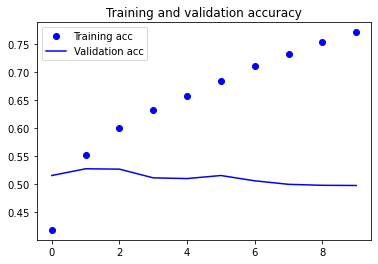

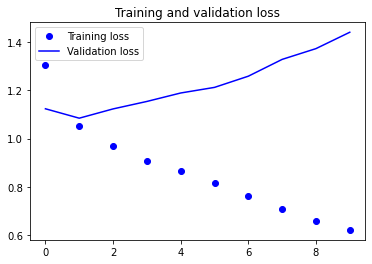

In [35]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### LSTM Baseline - 2 x 32 nodes GRU layers with Adam optimizer and 128 batch size

In [36]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 70, 64)            960000    
                                                                 
 lstm (LSTM)                 (None, 70, 32)            12416     
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 980,901
Trainable params: 980,901
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
195/195 [==============================] - 23s 98ms/step - loss: 1.3348 - acc: 0.4135 - val_loss: 1.1395 - val_acc: 0.5078
Epoch 2/10
195/195 [==============================] - 18s 93ms/step - loss: 1.0701 - acc: 0.5496 - val_loss: 1.0940 - val_acc: 0.5228
Epoch 3/10
195/195 [==============================] - 18s 92ms/step - loss: 0.9815 - acc: 0.5958 - val_loss: 1.1080 - val_acc: 0.5310
Epoch 4/10
195/195 [==============================] - 18s 94ms/step - loss: 0.9169 - acc: 0.6316 - val_loss: 1.1353 - val_acc: 0.5334
Epoch 5/10
195/195 [==============================] - 18s 94ms/step - loss: 0.8659 - acc: 0.6555 - val_loss: 1.1458 - val_acc: 0.5271
Epoch 6/10
195/195 [==============================] - 18s 93ms/step - loss: 0.8113 - acc: 0.6860 - val_loss: 1.1888 - val_acc: 0.5139
Epoch 7/10
195/195 [==============================] - 18s 93ms/step - loss: 0.7645 - acc: 0.7068 - val_loss: 1.2640 - val_acc: 0.5162
Epoch 8/10
195/195 [==============================] - 19s 95ms

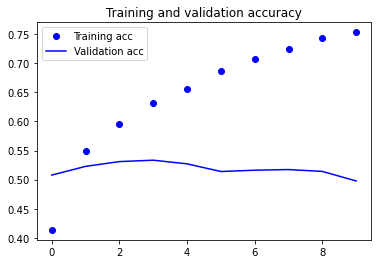

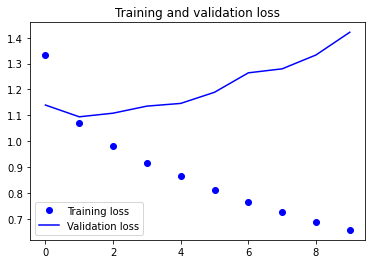

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 2.2 GRU Step 1: Tuning the weights

#### GRU Model 1 - 1 GRU layer with 32 hidden units

In [132]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_62 (GRU)                (None, 32)                9408      
                                                                 
 dense_34 (Dense)            (None, 5)                 165       
                                                                 
Total params: 969,573
Trainable params: 969,573
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
195/195 [==============================] - 15s 66ms/step - loss: 1.3447 - acc: 0.4044 - val_loss: 1.1526 - val_acc: 0.4922
Epoch 2/20
195/195 [==============================] - 10s 53ms/step - loss: 1.0669 - acc: 0.5459 - val_loss: 1.0857 - val_acc: 0.5271
Epoch 3/20
195/195 [==============================] - 10s 51ms/step - loss: 0.9661 - acc: 0.6080 - val_loss: 1.1089 - val_acc: 0.5281
Epoch 4/20
195/195 [==============================] - 10s 52ms/step - loss: 0.8894 - acc: 0.6468 - val_loss: 1.1344 - val_acc: 0.5237
Epoch 5/20
195/195 [==============================] - 10s 49ms/step - loss: 0.8234 - acc: 0.6806 - val_loss: 1.2083 - val_acc: 0.5184
Epoch 6/20
195/195 [==============================] - 11s 54ms/step - loss: 0.7657 - acc: 0.7074 - val_loss: 1.2442 - val_acc: 0.5146
Epoch 7/20
195/195 [==============================] - 10s 52ms/step - loss: 0.7173 - acc: 0.7280 - val_loss: 1.3016 - val_acc: 0.5031


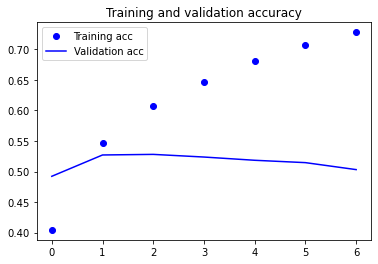

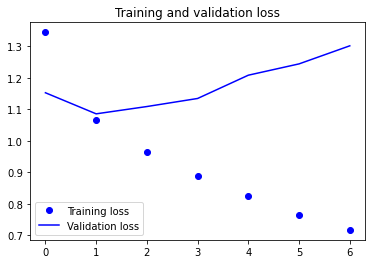

In [134]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 2 - 2 GRU layers with 32 hidden units

In [135]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_37 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_63 (GRU)                (None, 70, 32)            9408      
                                                                 
 gru_64 (GRU)                (None, 32)                6336      
                                                                 
 dense_35 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
195/195 [==============================] - 21s 91ms/step - loss: 1.2880 - acc: 0.4351 - val_loss: 1.1226 - val_acc: 0.5123
Epoch 2/20
195/195 [==============================] - 18s 94ms/step - loss: 1.0435 - acc: 0.5577 - val_loss: 1.0913 - val_acc: 0.5332
Epoch 3/20
195/195 [==============================] - 18s 91ms/step - loss: 0.9624 - acc: 0.6007 - val_loss: 1.1117 - val_acc: 0.5263
Epoch 4/20
195/195 [==============================] - 17s 86ms/step - loss: 0.8998 - acc: 0.6380 - val_loss: 1.1349 - val_acc: 0.5170
Epoch 5/20
195/195 [==============================] - 17s 85ms/step - loss: 0.8522 - acc: 0.6653 - val_loss: 1.1849 - val_acc: 0.5247
Epoch 6/20
195/195 [==============================] - 17s 86ms/step - loss: 0.8035 - acc: 0.6902 - val_loss: 1.2359 - val_acc: 0.5107


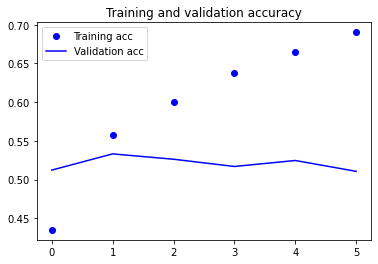

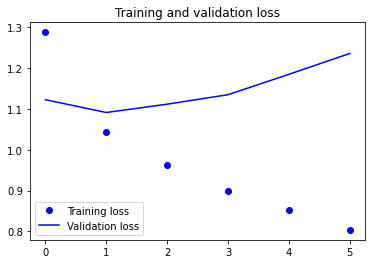

In [137]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 3 - 3 GRU layers with 32 hidden units

In [138]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_38 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_65 (GRU)                (None, 70, 32)            9408      
                                                                 
 gru_66 (GRU)                (None, 70, 32)            6336      
                                                                 
 gru_67 (GRU)                (None, 32)                6336      
                                                                 
 dense_36 (Dense)            (None, 5)                 165       
                                                                 
Total params: 982,245
Trainable params: 982,245
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
195/195 [==============================] - 35s 139ms/step - loss: 1.2991 - acc: 0.4245 - val_loss: 1.1288 - val_acc: 0.5015
Epoch 2/20
195/195 [==============================] - 24s 125ms/step - loss: 1.0576 - acc: 0.5522 - val_loss: 1.0983 - val_acc: 0.5239
Epoch 3/20
195/195 [==============================] - 25s 129ms/step - loss: 0.9710 - acc: 0.5966 - val_loss: 1.1104 - val_acc: 0.5273
Epoch 4/20
195/195 [==============================] - 24s 125ms/step - loss: 0.9061 - acc: 0.6327 - val_loss: 1.1356 - val_acc: 0.5234
Epoch 5/20
195/195 [==============================] - 27s 139ms/step - loss: 0.8533 - acc: 0.6641 - val_loss: 1.1836 - val_acc: 0.5126
Epoch 6/20
195/195 [==============================] - 29s 149ms/step - loss: 0.7995 - acc: 0.6932 - val_loss: 1.2697 - val_acc: 0.5023
Epoch 7/20
195/195 [==============================] - 26s 134ms/step - loss: 0.7508 - acc: 0.7160 - val_loss: 1.2741 - val_acc: 0.5007


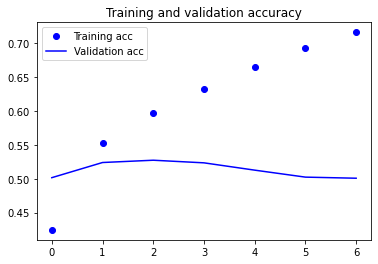

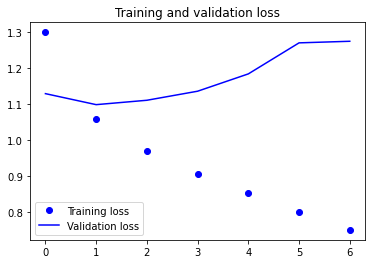

In [140]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 4 - 4 GRU layers with 32 hidden units

In [141]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_39 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_68 (GRU)                (None, 70, 32)            9408      
                                                                 
 gru_69 (GRU)                (None, 70, 32)            6336      
                                                                 
 gru_70 (GRU)                (None, 70, 32)            6336      
                                                                 
 gru_71 (GRU)                (None, 32)                6336      
                                                                 
 dense_37 (Dense)            (None, 5)                 165       
                                                                 
Total params: 988,581
Trainable params: 988,581
Non-t

In [142]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
195/195 [==============================] - 44s 186ms/step - loss: 1.3196 - acc: 0.4028 - val_loss: 1.1299 - val_acc: 0.4999
Epoch 2/20
195/195 [==============================] - 35s 179ms/step - loss: 1.0684 - acc: 0.5441 - val_loss: 1.1048 - val_acc: 0.5252
Epoch 3/20
195/195 [==============================] - 36s 186ms/step - loss: 0.9789 - acc: 0.5909 - val_loss: 1.1075 - val_acc: 0.5284
Epoch 4/20
195/195 [==============================] - 36s 182ms/step - loss: 0.9183 - acc: 0.6280 - val_loss: 1.1356 - val_acc: 0.5175
Epoch 5/20
195/195 [==============================] - 39s 202ms/step - loss: 0.8666 - acc: 0.6581 - val_loss: 1.1784 - val_acc: 0.5157
Epoch 6/20
195/195 [==============================] - 34s 175ms/step - loss: 0.8251 - acc: 0.6766 - val_loss: 1.2272 - val_acc: 0.4994
Epoch 7/20
195/195 [==============================] - 33s 167ms/step - loss: 0.7835 - acc: 0.7035 - val_loss: 1.2766 - val_acc: 0.5004


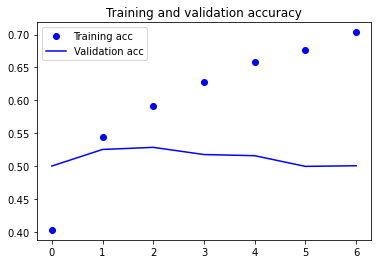

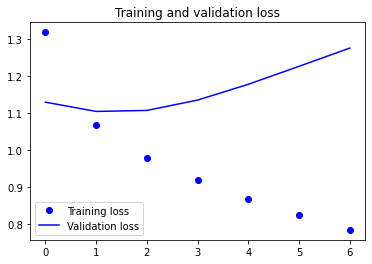

In [143]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 5 - 16 hidden units with 2 GRU layers

In [144]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(16, return_sequences=True))
model.add(GRU(16))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_40 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_72 (GRU)                (None, 70, 16)            3936      
                                                                 
 gru_73 (GRU)                (None, 16)                1632      
                                                                 
 dense_38 (Dense)            (None, 5)                 85        
                                                                 
Total params: 965,653
Trainable params: 965,653
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
195/195 [==============================] - 21s 87ms/step - loss: 1.3692 - acc: 0.3970 - val_loss: 1.1420 - val_acc: 0.5022
Epoch 2/20
195/195 [==============================] - 16s 82ms/step - loss: 1.0699 - acc: 0.5471 - val_loss: 1.1053 - val_acc: 0.5181
Epoch 3/20
195/195 [==============================] - 16s 84ms/step - loss: 0.9721 - acc: 0.6020 - val_loss: 1.1077 - val_acc: 0.5279
Epoch 4/20
195/195 [==============================] - 16s 84ms/step - loss: 0.9026 - acc: 0.6388 - val_loss: 1.1383 - val_acc: 0.5226
Epoch 5/20
195/195 [==============================] - 17s 89ms/step - loss: 0.8431 - acc: 0.6721 - val_loss: 1.1870 - val_acc: 0.5115
Epoch 6/20
195/195 [==============================] - 16s 84ms/step - loss: 0.7863 - acc: 0.7034 - val_loss: 1.2283 - val_acc: 0.5064
Epoch 7/20
195/195 [==============================] - 17s 86ms/step - loss: 0.7338 - acc: 0.7281 - val_loss: 1.2663 - val_acc: 0.5078


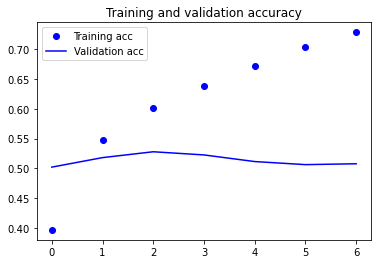

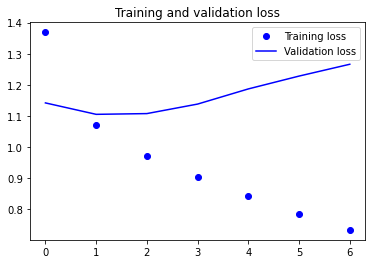

In [146]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 6 - 32 hidden units with 2 GRU layers

In [147]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_41 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_74 (GRU)                (None, 70, 32)            9408      
                                                                 
 gru_75 (GRU)                (None, 32)                6336      
                                                                 
 dense_39 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
195/195 [==============================] - 26s 107ms/step - loss: 1.3159 - acc: 0.4141 - val_loss: 1.1204 - val_acc: 0.5118
Epoch 2/20
195/195 [==============================] - 19s 96ms/step - loss: 1.0589 - acc: 0.5513 - val_loss: 1.0896 - val_acc: 0.5257
Epoch 3/20
195/195 [==============================] - 19s 99ms/step - loss: 0.9672 - acc: 0.6010 - val_loss: 1.1075 - val_acc: 0.5318
Epoch 4/20
195/195 [==============================] - 19s 97ms/step - loss: 0.9043 - acc: 0.6342 - val_loss: 1.1441 - val_acc: 0.5142
Epoch 5/20
195/195 [==============================] - 19s 99ms/step - loss: 0.8517 - acc: 0.6635 - val_loss: 1.1839 - val_acc: 0.5173
Epoch 6/20
195/195 [==============================] - 20s 103ms/step - loss: 0.8007 - acc: 0.6935 - val_loss: 1.2264 - val_acc: 0.5107
Epoch 7/20
195/195 [==============================] - 19s 98ms/step - loss: 0.7458 - acc: 0.7197 - val_loss: 1.2827 - val_acc: 0.5027


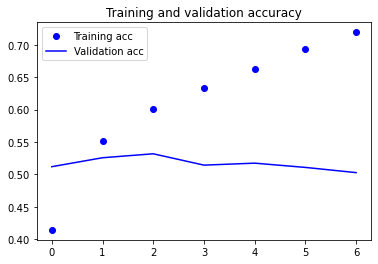

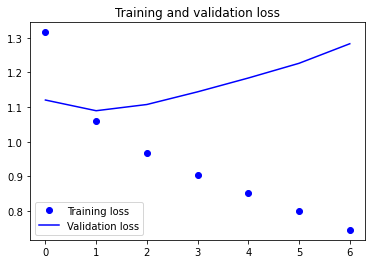

In [149]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 7 - 64 hidden units with 2 GRU layers

In [150]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(64, return_sequences=True))
model.add(GRU(64))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_42 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_76 (GRU)                (None, 70, 64)            24960     
                                                                 
 gru_77 (GRU)                (None, 64)                24960     
                                                                 
 dense_40 (Dense)            (None, 5)                 325       
                                                                 
Total params: 1,010,245
Trainable params: 1,010,245
Non-trainable params: 0
_________________________________________________________________


In [151]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
195/195 [==============================] - 69s 336ms/step - loss: 1.2894 - acc: 0.4239 - val_loss: 1.1168 - val_acc: 0.5107
Epoch 2/20
195/195 [==============================] - 74s 380ms/step - loss: 1.0432 - acc: 0.5601 - val_loss: 1.0825 - val_acc: 0.5265
Epoch 3/20
195/195 [==============================] - 68s 350ms/step - loss: 0.9498 - acc: 0.6093 - val_loss: 1.1008 - val_acc: 0.5245
Epoch 4/20
195/195 [==============================] - 67s 345ms/step - loss: 0.8798 - acc: 0.6466 - val_loss: 1.1390 - val_acc: 0.5154
Epoch 5/20
195/195 [==============================] - 76s 390ms/step - loss: 0.8194 - acc: 0.6775 - val_loss: 1.1956 - val_acc: 0.5113
Epoch 6/20
195/195 [==============================] - 66s 341ms/step - loss: 0.7656 - acc: 0.7041 - val_loss: 1.2656 - val_acc: 0.5115


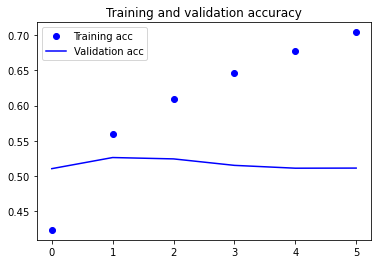

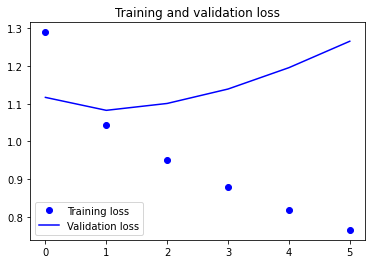

In [152]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 8 - 128 hidden units with 2 GRU layers

In [153]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(128, return_sequences=True))
model.add(GRU(128))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_43 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_78 (GRU)                (None, 70, 128)           74496     
                                                                 
 gru_79 (GRU)                (None, 128)               99072     
                                                                 
 dense_41 (Dense)            (None, 5)                 645       
                                                                 
Total params: 1,134,213
Trainable params: 1,134,213
Non-trainable params: 0
_________________________________________________________________


In [154]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
195/195 [==============================] - 129s 647ms/step - loss: 1.2758 - acc: 0.4301 - val_loss: 1.1140 - val_acc: 0.5149
Epoch 2/20
195/195 [==============================] - 127s 650ms/step - loss: 1.0462 - acc: 0.5534 - val_loss: 1.0766 - val_acc: 0.5343
Epoch 3/20
195/195 [==============================] - 125s 643ms/step - loss: 0.9565 - acc: 0.6032 - val_loss: 1.1107 - val_acc: 0.5221
Epoch 4/20
195/195 [==============================] - 128s 656ms/step - loss: 0.8806 - acc: 0.6477 - val_loss: 1.1583 - val_acc: 0.5207
Epoch 5/20
195/195 [==============================] - 126s 647ms/step - loss: 0.8060 - acc: 0.6830 - val_loss: 1.2066 - val_acc: 0.5068
Epoch 6/20
195/195 [==============================] - 126s 648ms/step - loss: 0.7293 - acc: 0.7171 - val_loss: 1.2701 - val_acc: 0.5105


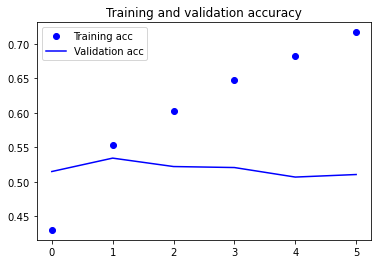

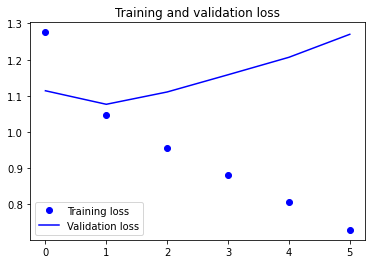

In [155]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Best weights: 2 GRU layers, 32 recurrent units

### GRU Step 2: Tuning the batch size and optimizer

#### GRU Model 9 - Batch size of 32

In [167]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_48 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_88 (GRU)                (None, 70, 32)            9408      
                                                                 
 gru_89 (GRU)                (None, 32)                6336      
                                                                 
 dense_46 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [168]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
778/778 [==============================] - 63s 76ms/step - loss: 1.2059 - acc: 0.4725 - val_loss: 1.0912 - val_acc: 0.5268
Epoch 2/20
778/778 [==============================] - 56s 72ms/step - loss: 1.0196 - acc: 0.5657 - val_loss: 1.0805 - val_acc: 0.5369
Epoch 3/20
778/778 [==============================] - 56s 72ms/step - loss: 0.9286 - acc: 0.6215 - val_loss: 1.1394 - val_acc: 0.5166
Epoch 4/20
778/778 [==============================] - 56s 72ms/step - loss: 0.8397 - acc: 0.6680 - val_loss: 1.1733 - val_acc: 0.5175
Epoch 5/20
778/778 [==============================] - 60s 77ms/step - loss: 0.7511 - acc: 0.7126 - val_loss: 1.2583 - val_acc: 0.5105
Epoch 6/20
778/778 [==============================] - 52s 67ms/step - loss: 0.6821 - acc: 0.7402 - val_loss: 1.3129 - val_acc: 0.5017


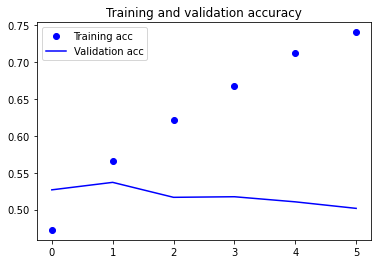

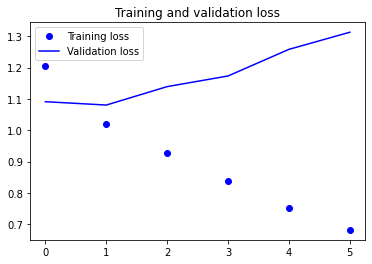

In [169]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 10 - Batch size of 64

In [164]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_47 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_86 (GRU)                (None, 70, 32)            9408      
                                                                 
 gru_87 (GRU)                (None, 32)                6336      
                                                                 
 dense_45 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [165]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
389/389 [==============================] - 36s 84ms/step - loss: 1.2410 - acc: 0.4533 - val_loss: 1.1017 - val_acc: 0.5170
Epoch 2/20
389/389 [==============================] - 32s 83ms/step - loss: 1.0282 - acc: 0.5652 - val_loss: 1.0795 - val_acc: 0.5297
Epoch 3/20
389/389 [==============================] - 32s 83ms/step - loss: 0.9355 - acc: 0.6154 - val_loss: 1.1093 - val_acc: 0.5205
Epoch 4/20
389/389 [==============================] - 32s 81ms/step - loss: 0.8529 - acc: 0.6630 - val_loss: 1.1669 - val_acc: 0.5160
Epoch 5/20
389/389 [==============================] - 30s 77ms/step - loss: 0.7765 - acc: 0.7000 - val_loss: 1.2290 - val_acc: 0.5146
Epoch 6/20
389/389 [==============================] - 32s 81ms/step - loss: 0.7095 - acc: 0.7312 - val_loss: 1.3036 - val_acc: 0.5025


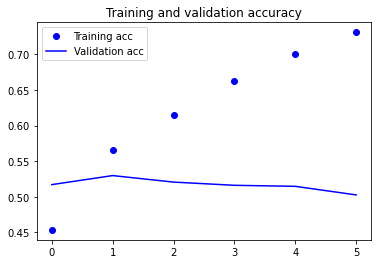

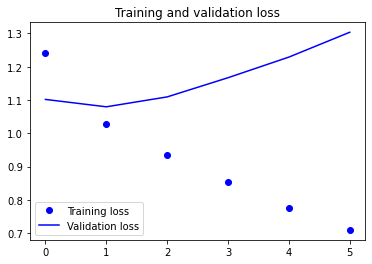

In [166]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 11 - Batch size of 128

In [170]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_49 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_90 (GRU)                (None, 70, 32)            9408      
                                                                 
 gru_91 (GRU)                (None, 32)                6336      
                                                                 
 dense_47 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [171]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
195/195 [==============================] - 24s 110ms/step - loss: 1.3132 - acc: 0.4146 - val_loss: 1.1496 - val_acc: 0.4985
Epoch 2/20
195/195 [==============================] - 22s 115ms/step - loss: 1.0488 - acc: 0.5578 - val_loss: 1.0926 - val_acc: 0.5266
Epoch 3/20
195/195 [==============================] - 21s 110ms/step - loss: 0.9591 - acc: 0.6082 - val_loss: 1.1000 - val_acc: 0.5292
Epoch 4/20
195/195 [==============================] - 21s 110ms/step - loss: 0.8881 - acc: 0.6444 - val_loss: 1.1403 - val_acc: 0.5292
Epoch 5/20
195/195 [==============================] - 21s 107ms/step - loss: 0.8257 - acc: 0.6781 - val_loss: 1.2048 - val_acc: 0.5165
Epoch 6/20
195/195 [==============================] - 22s 111ms/step - loss: 0.7673 - acc: 0.7087 - val_loss: 1.2622 - val_acc: 0.5097
Epoch 7/20
195/195 [==============================] - 21s 106ms/step - loss: 0.7157 - acc: 0.7300 - val_loss: 1.2982 - val_acc: 0.5039


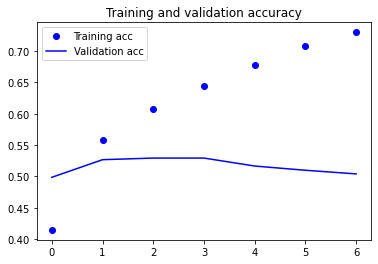

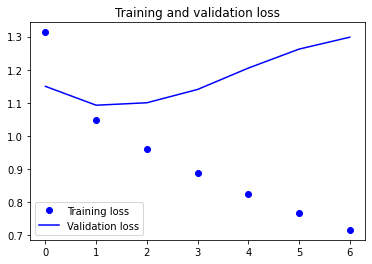

In [172]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 12 - Batch size of 256

In [173]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_50 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_92 (GRU)                (None, 70, 32)            9408      
                                                                 
 gru_93 (GRU)                (None, 32)                6336      
                                                                 
 dense_48 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [174]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=256,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
98/98 [==============================] - 32s 285ms/step - loss: 1.3930 - acc: 0.3813 - val_loss: 1.1705 - val_acc: 0.4816
Epoch 2/20
98/98 [==============================] - 28s 288ms/step - loss: 1.0965 - acc: 0.5310 - val_loss: 1.0963 - val_acc: 0.5216
Epoch 3/20
98/98 [==============================] - 28s 288ms/step - loss: 0.9964 - acc: 0.5894 - val_loss: 1.1030 - val_acc: 0.5271
Epoch 4/20
98/98 [==============================] - 28s 283ms/step - loss: 0.9324 - acc: 0.6182 - val_loss: 1.1306 - val_acc: 0.5205
Epoch 5/20
98/98 [==============================] - 30s 310ms/step - loss: 0.8820 - acc: 0.6491 - val_loss: 1.1492 - val_acc: 0.5184
Epoch 6/20
98/98 [==============================] - 28s 288ms/step - loss: 0.8413 - acc: 0.6704 - val_loss: 1.2013 - val_acc: 0.5146
Epoch 7/20
98/98 [==============================] - 28s 284ms/step - loss: 0.8027 - acc: 0.6902 - val_loss: 1.2219 - val_acc: 0.5115


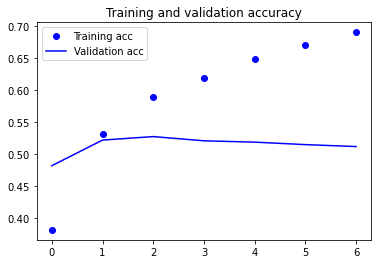

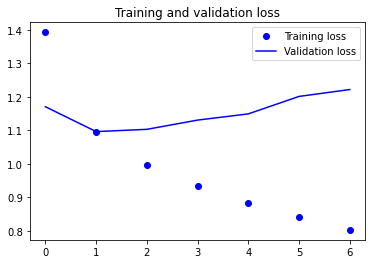

In [175]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 13 - Batch size of 512

In [176]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_51 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_94 (GRU)                (None, 70, 32)            9408      
                                                                 
 gru_95 (GRU)                (None, 32)                6336      
                                                                 
 dense_49 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [177]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
49/49 [==============================] - 25s 464ms/step - loss: 1.5186 - acc: 0.3203 - val_loss: 1.3737 - val_acc: 0.3793
Epoch 2/20
49/49 [==============================] - 24s 483ms/step - loss: 1.2466 - acc: 0.4512 - val_loss: 1.1970 - val_acc: 0.4769
Epoch 3/20
49/49 [==============================] - 22s 455ms/step - loss: 1.0770 - acc: 0.5414 - val_loss: 1.1123 - val_acc: 0.5120
Epoch 4/20
49/49 [==============================] - 22s 447ms/step - loss: 0.9851 - acc: 0.5942 - val_loss: 1.1074 - val_acc: 0.5197
Epoch 5/20
49/49 [==============================] - 23s 465ms/step - loss: 0.9243 - acc: 0.6250 - val_loss: 1.1389 - val_acc: 0.5173
Epoch 6/20
49/49 [==============================] - 22s 452ms/step - loss: 0.8769 - acc: 0.6528 - val_loss: 1.1641 - val_acc: 0.5192
Epoch 7/20
49/49 [==============================] - 22s 454ms/step - loss: 0.8312 - acc: 0.6778 - val_loss: 1.1931 - val_acc: 0.5168
Epoch 8/20
49/49 [==============================] - 22s 451ms/step - 

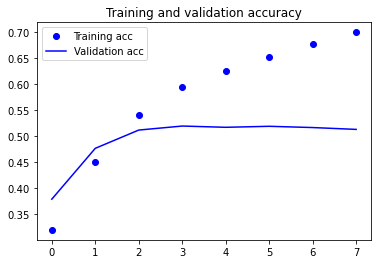

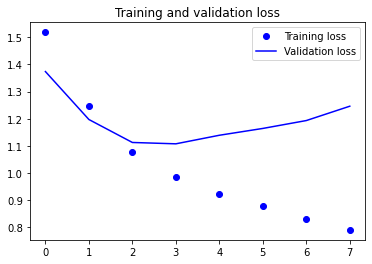

In [178]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Lower batch size = overfit earlier but higher accuracy
Best batch size (in terms of accuracy): 32

#### GRU Model 14 - Adam optimizer

In [236]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_66 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_124 (GRU)               (None, 70, 32)            9408      
                                                                 
 gru_125 (GRU)               (None, 32)                6336      
                                                                 
 dense_64 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [237]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
778/778 [==============================] - 57s 69ms/step - loss: 1.2102 - acc: 0.4703 - val_loss: 1.0911 - val_acc: 0.5228
Epoch 2/20
778/778 [==============================] - 53s 68ms/step - loss: 1.0227 - acc: 0.5683 - val_loss: 1.0778 - val_acc: 0.5374
Epoch 3/20
778/778 [==============================] - 54s 69ms/step - loss: 0.9304 - acc: 0.6235 - val_loss: 1.1066 - val_acc: 0.5284
Epoch 4/20
778/778 [==============================] - 54s 69ms/step - loss: 0.8403 - acc: 0.6696 - val_loss: 1.1740 - val_acc: 0.5178
Epoch 5/20
778/778 [==============================] - 53s 69ms/step - loss: 0.7575 - acc: 0.7093 - val_loss: 1.2354 - val_acc: 0.5150
Epoch 6/20
778/778 [==============================] - 54s 69ms/step - loss: 0.6882 - acc: 0.7395 - val_loss: 1.3071 - val_acc: 0.5043


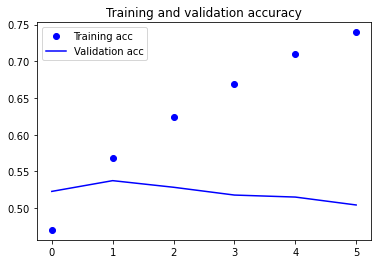

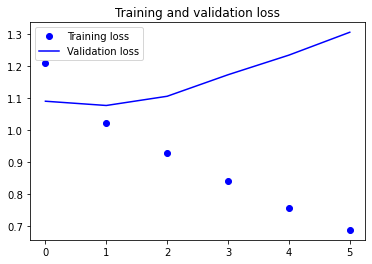

In [238]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 15 - RMSprop optimizer

In [69]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 70, 64)            960000    
                                                                 
 gru_2 (GRU)                 (None, 70, 32)            9408      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
778/778 [==============================] - 55s 66ms/step - loss: 1.2329 - acc: 0.4576 - val_loss: 1.1797 - val_acc: 0.4790
Epoch 2/20
778/778 [==============================] - 54s 69ms/step - loss: 1.0743 - acc: 0.5379 - val_loss: 1.1248 - val_acc: 0.5136
Epoch 3/20
778/778 [==============================] - 53s 68ms/step - loss: 1.0300 - acc: 0.5674 - val_loss: 1.0810 - val_acc: 0.5300
Epoch 4/20
778/778 [==============================] - 52s 67ms/step - loss: 0.9953 - acc: 0.5923 - val_loss: 1.0937 - val_acc: 0.5311
Epoch 5/20
778/778 [==============================] - 55s 71ms/step - loss: 0.9644 - acc: 0.6082 - val_loss: 1.0863 - val_acc: 0.5384
Epoch 6/20
778/778 [==============================] - 59s 75ms/step - loss: 0.9325 - acc: 0.6276 - val_loss: 1.1500 - val_acc: 0.5269
Epoch 7/20
778/778 [==============================] - 63s 81ms/step - loss: 0.8975 - acc: 0.6470 - val_loss: 1.1144 - val_acc: 0.5294
Epoch 8/20
778/778 [==============================] - 55s 71ms

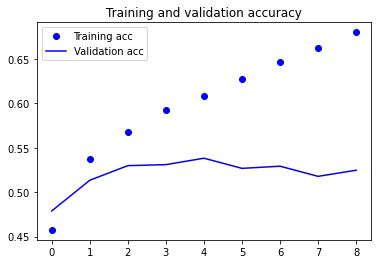

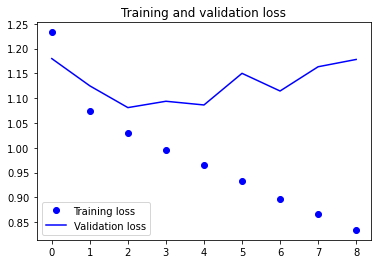

In [71]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 16 - Rectified Adam optimizer

In [212]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_58 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_108 (GRU)               (None, 70, 32)            9408      
                                                                 
 gru_109 (GRU)               (None, 32)                6336      
                                                                 
 dense_56 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [213]:
from keras_radam import RAdam
optimizer = RAdam()
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
778/778 [==============================] - 61s 68ms/step - loss: 1.3640 - acc: 0.3887 - val_loss: 1.1732 - val_acc: 0.4843
Epoch 2/20
778/778 [==============================] - 56s 72ms/step - loss: 1.1294 - acc: 0.5112 - val_loss: 1.1116 - val_acc: 0.5109
Epoch 3/20
778/778 [==============================] - 55s 71ms/step - loss: 1.0710 - acc: 0.5416 - val_loss: 1.0907 - val_acc: 0.5249
Epoch 4/20
778/778 [==============================] - 56s 71ms/step - loss: 1.0300 - acc: 0.5617 - val_loss: 1.0942 - val_acc: 0.5228
Epoch 5/20
778/778 [==============================] - 72s 93ms/step - loss: 0.9963 - acc: 0.5825 - val_loss: 1.1054 - val_acc: 0.5234
Epoch 6/20
778/778 [==============================] - 61s 78ms/step - loss: 0.9656 - acc: 0.5987 - val_loss: 1.1021 - val_acc: 0.5286
Epoch 7/20
778/778 [==============================] - 56s 72ms/step - loss: 0.9339 - acc: 0.6186 - val_loss: 1.1150 - val_acc: 0.5269
Epoch 8/20
778/778 [==============================] - 56s 72ms

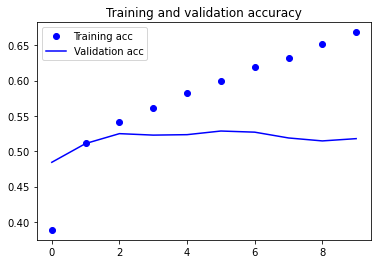

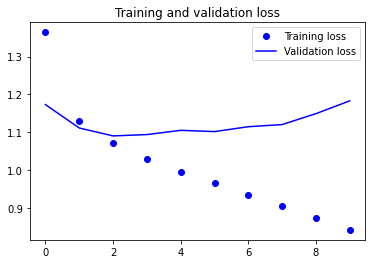

In [214]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Best optimizer: RMSprop

### GRU Step 3: Reduce Overfitting

#### GRU Model 18 - L2 regularization

In [215]:
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, recurrent_regularizer = regularizers.l2(0.001), return_sequences = True))
model.add(GRU(32, recurrent_regularizer = regularizers.l2(0.001)))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_59 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_110 (GRU)               (None, 70, 32)            9408      
                                                                 
 gru_111 (GRU)               (None, 32)                6336      
                                                                 
 dense_57 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [216]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
778/778 [==============================] - 53s 64ms/step - loss: 1.2638 - acc: 0.4476 - val_loss: 1.1586 - val_acc: 0.4970
Epoch 2/20
778/778 [==============================] - 53s 68ms/step - loss: 1.1044 - acc: 0.5377 - val_loss: 1.1218 - val_acc: 0.5189
Epoch 3/20
778/778 [==============================] - 51s 66ms/step - loss: 1.0523 - acc: 0.5655 - val_loss: 1.1105 - val_acc: 0.5218
Epoch 4/20
778/778 [==============================] - 54s 70ms/step - loss: 1.0135 - acc: 0.5878 - val_loss: 1.1303 - val_acc: 0.5242
Epoch 5/20
778/778 [==============================] - 52s 67ms/step - loss: 0.9804 - acc: 0.6077 - val_loss: 1.1259 - val_acc: 0.5189
Epoch 6/20
778/778 [==============================] - 51s 66ms/step - loss: 0.9499 - acc: 0.6244 - val_loss: 1.1288 - val_acc: 0.5284
Epoch 7/20
778/778 [==============================] - 51s 66ms/step - loss: 0.9151 - acc: 0.6437 - val_loss: 1.1485 - val_acc: 0.5331
Epoch 8/20
778/778 [==============================] - 51s 65ms

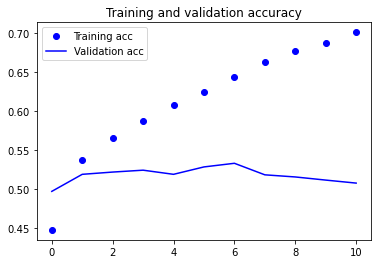

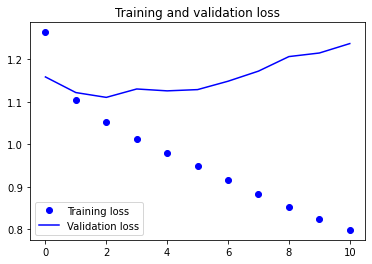

In [217]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 19 - Recurrent Dropout

In [218]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, recurrent_dropout = 0.1, return_sequences = True))
model.add(GRU(32, recurrent_dropout = 0.1))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_60 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_112 (GRU)               (None, 70, 32)            9408      
                                                                 
 gru_113 (GRU)               (None, 32)                6336      
                                                                 
 dense_58 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [219]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
778/778 [==============================] - 65s 79ms/step - loss: 1.2393 - acc: 0.4482 - val_loss: 1.1180 - val_acc: 0.5171
Epoch 2/20
778/778 [==============================] - 62s 79ms/step - loss: 1.0845 - acc: 0.5373 - val_loss: 1.0931 - val_acc: 0.5257
Epoch 3/20
778/778 [==============================] - 63s 80ms/step - loss: 1.0357 - acc: 0.5691 - val_loss: 1.0771 - val_acc: 0.5316
Epoch 4/20
778/778 [==============================] - 62s 80ms/step - loss: 1.0004 - acc: 0.5856 - val_loss: 1.0797 - val_acc: 0.5329
Epoch 5/20
778/778 [==============================] - 62s 80ms/step - loss: 0.9695 - acc: 0.6076 - val_loss: 1.1052 - val_acc: 0.5216
Epoch 6/20
778/778 [==============================] - 63s 81ms/step - loss: 0.9361 - acc: 0.6281 - val_loss: 1.1274 - val_acc: 0.5229
Epoch 7/20
778/778 [==============================] - 62s 80ms/step - loss: 0.9026 - acc: 0.6411 - val_loss: 1.1368 - val_acc: 0.5231
Epoch 8/20
778/778 [==============================] - 62s 79ms

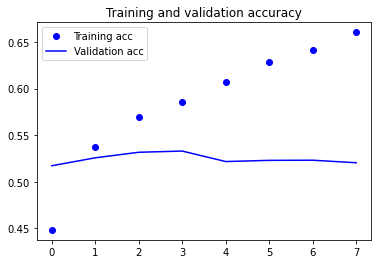

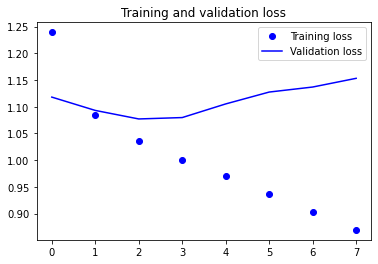

In [220]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 20 - Regular Dropout

In [239]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, dropout = 0.1, return_sequences = True))
model.add(GRU(32, dropout = 0.1))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_67 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_126 (GRU)               (None, 70, 32)            9408      
                                                                 
 gru_127 (GRU)               (None, 32)                6336      
                                                                 
 dense_65 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [240]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
778/778 [==============================] - 111s 129ms/step - loss: 1.2325 - acc: 0.4527 - val_loss: 1.2496 - val_acc: 0.4669
Epoch 2/20
778/778 [==============================] - 85s 109ms/step - loss: 1.0832 - acc: 0.5391 - val_loss: 1.1201 - val_acc: 0.5155
Epoch 3/20
778/778 [==============================] - 79s 101ms/step - loss: 1.0411 - acc: 0.5613 - val_loss: 1.1301 - val_acc: 0.4993
Epoch 4/20
778/778 [==============================] - 73s 94ms/step - loss: 1.0114 - acc: 0.5806 - val_loss: 1.0776 - val_acc: 0.5318
Epoch 5/20
778/778 [==============================] - 75s 96ms/step - loss: 0.9840 - acc: 0.5958 - val_loss: 1.1259 - val_acc: 0.5229
Epoch 6/20
778/778 [==============================] - 77s 99ms/step - loss: 0.9565 - acc: 0.6142 - val_loss: 1.0902 - val_acc: 0.5313
Epoch 7/20
778/778 [==============================] - 77s 99ms/step - loss: 0.9299 - acc: 0.6296 - val_loss: 1.1017 - val_acc: 0.5306
Epoch 8/20
778/778 [==============================] - 81s 

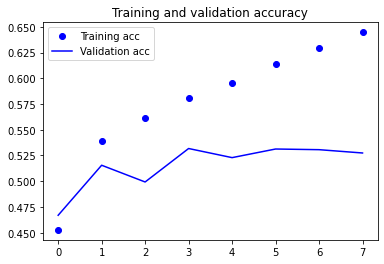

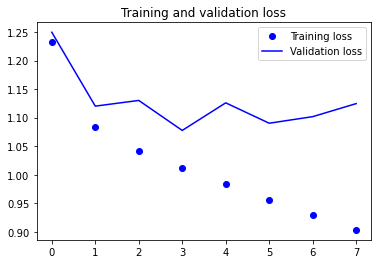

In [241]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 21 - Recurrent Dropout + Regular Dropout

In [224]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, dropout = 0.1, recurrent_dropout = 0.1, return_sequences = True))
model.add(GRU(32, dropout = 0.1, recurrent_dropout = 0.1))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_62 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_116 (GRU)               (None, 70, 32)            9408      
                                                                 
 gru_117 (GRU)               (None, 32)                6336      
                                                                 
 dense_60 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [225]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
778/778 [==============================] - 80s 96ms/step - loss: 1.2283 - acc: 0.4585 - val_loss: 1.1586 - val_acc: 0.4951
Epoch 2/20
778/778 [==============================] - 76s 97ms/step - loss: 1.0789 - acc: 0.5416 - val_loss: 1.1753 - val_acc: 0.4922
Epoch 3/20
778/778 [==============================] - 75s 97ms/step - loss: 1.0377 - acc: 0.5643 - val_loss: 1.0861 - val_acc: 0.5294
Epoch 4/20
778/778 [==============================] - 75s 97ms/step - loss: 1.0060 - acc: 0.5825 - val_loss: 1.0861 - val_acc: 0.5311
Epoch 5/20
778/778 [==============================] - 74s 95ms/step - loss: 0.9790 - acc: 0.5995 - val_loss: 1.0991 - val_acc: 0.5253
Epoch 6/20
778/778 [==============================] - 75s 97ms/step - loss: 0.9516 - acc: 0.6157 - val_loss: 1.1040 - val_acc: 0.5261
Epoch 7/20
778/778 [==============================] - 74s 95ms/step - loss: 0.9235 - acc: 0.6310 - val_loss: 1.1167 - val_acc: 0.5273
Epoch 8/20
778/778 [==============================] - 77s 99ms

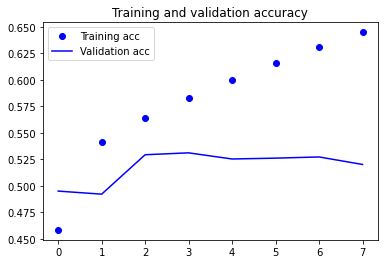

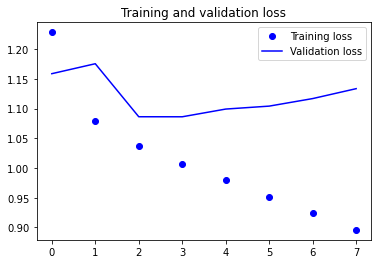

In [226]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 22 - Recurrent Dropout + L2 regularization

In [227]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, recurrent_dropout = 0.1, recurrent_regularizer = regularizers.l2(0.001), return_sequences = True))
model.add(GRU(32, recurrent_dropout = 0.1, recurrent_regularizer = regularizers.l2(0.001)))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_63 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_118 (GRU)               (None, 70, 32)            9408      
                                                                 
 gru_119 (GRU)               (None, 32)                6336      
                                                                 
 dense_61 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [228]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
778/778 [==============================] - 68s 82ms/step - loss: 1.2699 - acc: 0.4467 - val_loss: 1.1438 - val_acc: 0.5030
Epoch 2/20
778/778 [==============================] - 64s 82ms/step - loss: 1.1030 - acc: 0.5338 - val_loss: 1.1506 - val_acc: 0.4980
Epoch 3/20
778/778 [==============================] - 63s 82ms/step - loss: 1.0550 - acc: 0.5646 - val_loss: 1.1035 - val_acc: 0.5240
Epoch 4/20
778/778 [==============================] - 61s 78ms/step - loss: 1.0185 - acc: 0.5840 - val_loss: 1.1100 - val_acc: 0.5284
Epoch 5/20
778/778 [==============================] - 62s 80ms/step - loss: 0.9874 - acc: 0.6034 - val_loss: 1.1098 - val_acc: 0.5277
Epoch 6/20
778/778 [==============================] - 61s 78ms/step - loss: 0.9579 - acc: 0.6202 - val_loss: 1.1600 - val_acc: 0.5028
Epoch 7/20
778/778 [==============================] - 62s 79ms/step - loss: 0.9279 - acc: 0.6355 - val_loss: 1.1668 - val_acc: 0.5134
Epoch 8/20
778/778 [==============================] - 63s 80ms

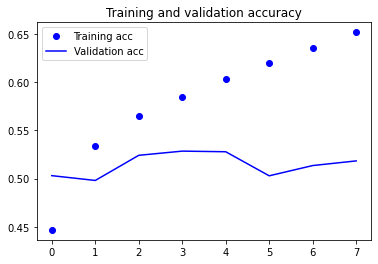

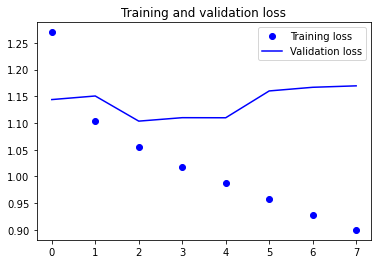

In [229]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 23 - Regular Dropout + L2 regularization

In [230]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, dropout = 0.1, recurrent_regularizer = regularizers.l2(0.001), return_sequences = True))
model.add(GRU(32, dropout = 0.1, recurrent_regularizer = regularizers.l2(0.001)))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_64 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_120 (GRU)               (None, 70, 32)            9408      
                                                                 
 gru_121 (GRU)               (None, 32)                6336      
                                                                 
 dense_62 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [231]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
778/778 [==============================] - 60s 73ms/step - loss: 1.2690 - acc: 0.4436 - val_loss: 1.1634 - val_acc: 0.4977
Epoch 2/20
778/778 [==============================] - 59s 76ms/step - loss: 1.1119 - acc: 0.5304 - val_loss: 1.1301 - val_acc: 0.5144
Epoch 3/20
778/778 [==============================] - 58s 75ms/step - loss: 1.0642 - acc: 0.5593 - val_loss: 1.1103 - val_acc: 0.5187
Epoch 4/20
778/778 [==============================] - 57s 74ms/step - loss: 1.0295 - acc: 0.5794 - val_loss: 1.1008 - val_acc: 0.5286
Epoch 5/20
778/778 [==============================] - 54s 70ms/step - loss: 1.0003 - acc: 0.5955 - val_loss: 1.1768 - val_acc: 0.5092
Epoch 6/20
778/778 [==============================] - 56s 71ms/step - loss: 0.9723 - acc: 0.6140 - val_loss: 1.1449 - val_acc: 0.5184
Epoch 7/20
778/778 [==============================] - 58s 75ms/step - loss: 0.9437 - acc: 0.6310 - val_loss: 1.1395 - val_acc: 0.5150
Epoch 8/20
778/778 [==============================] - 59s 76ms

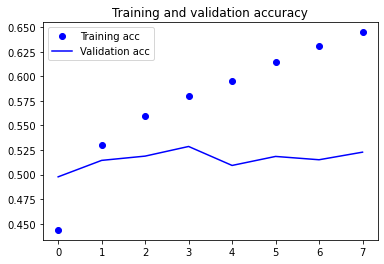

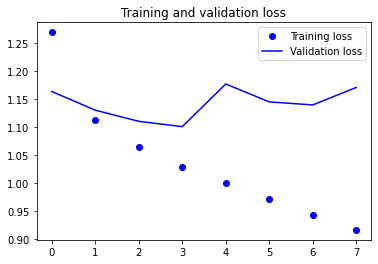

In [232]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 24 - Recurrent Dropout + Regular Dropout + L2 regularization

In [233]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, dropout = 0.1, recurrent_dropout = 0.1, 
              recurrent_regularizer = regularizers.l2(0.001), return_sequences = True))
model.add(GRU(32, dropout = 0.1, recurrent_dropout = 0.1, recurrent_regularizer = regularizers.l2(0.001)))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_65 (Embedding)    (None, 70, 64)            960000    
                                                                 
 gru_122 (GRU)               (None, 70, 32)            9408      
                                                                 
 gru_123 (GRU)               (None, 32)                6336      
                                                                 
 dense_63 (Dense)            (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [234]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
778/778 [==============================] - 84s 100ms/step - loss: 1.2780 - acc: 0.4399 - val_loss: 1.2145 - val_acc: 0.4721
Epoch 2/20
778/778 [==============================] - 73s 93ms/step - loss: 1.1167 - acc: 0.5289 - val_loss: 1.1240 - val_acc: 0.5181
Epoch 3/20
778/778 [==============================] - 73s 93ms/step - loss: 1.0663 - acc: 0.5573 - val_loss: 1.1032 - val_acc: 0.5295
Epoch 4/20
778/778 [==============================] - 72s 93ms/step - loss: 1.0330 - acc: 0.5760 - val_loss: 1.1364 - val_acc: 0.5184
Epoch 5/20
778/778 [==============================] - 73s 94ms/step - loss: 1.0029 - acc: 0.5926 - val_loss: 1.1192 - val_acc: 0.5141
Epoch 6/20
778/778 [==============================] - 74s 95ms/step - loss: 0.9767 - acc: 0.6122 - val_loss: 1.1521 - val_acc: 0.5138
Epoch 7/20
778/778 [==============================] - 74s 95ms/step - loss: 0.9491 - acc: 0.6274 - val_loss: 1.1322 - val_acc: 0.5253


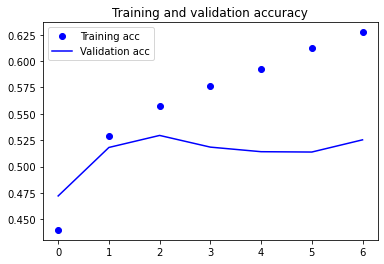

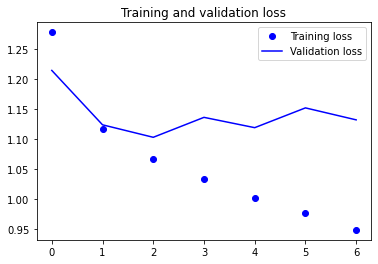

In [235]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### GRU Model 25 - Bidirectional GRU Layers

In [243]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(Bidirectional(GRU(32, return_sequences=True, recurrent_dropout = 0.1, recurrent_regularizer=regularizers.l2(0.001))))
model.add(Bidirectional(GRU(32, recurrent_dropout = 0.1, recurrent_regularizer=regularizers.l2(0.001))))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_68 (Embedding)    (None, 70, 64)            960000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 70, 64)           18816     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               18816     
 nal)                                                            
                                                                 
 dense_66 (Dense)            (None, 5)                 325       
                                                                 
Total params: 997,957
Trainable params: 997,957
Non-trainable params: 0
_________________________________________________________________


In [244]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                   callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)]
                   )

Epoch 1/50
778/778 [==============================] - 131s 155ms/step - loss: 1.2760 - acc: 0.4415 - val_loss: 1.2173 - val_acc: 0.4665
Epoch 2/50
778/778 [==============================] - 118s 152ms/step - loss: 1.1027 - acc: 0.5357 - val_loss: 1.1070 - val_acc: 0.5273
Epoch 3/50
778/778 [==============================] - 108s 139ms/step - loss: 1.0533 - acc: 0.5630 - val_loss: 1.1110 - val_acc: 0.5279
Epoch 4/50
778/778 [==============================] - 109s 140ms/step - loss: 1.0177 - acc: 0.5854 - val_loss: 1.1101 - val_acc: 0.5223
Epoch 5/50
778/778 [==============================] - 124s 160ms/step - loss: 0.9834 - acc: 0.6026 - val_loss: 1.1122 - val_acc: 0.5253
Epoch 6/50
778/778 [==============================] - 108s 138ms/step - loss: 0.9478 - acc: 0.6259 - val_loss: 1.1696 - val_acc: 0.5170
Epoch 7/50
778/778 [==============================] - 106s 136ms/step - loss: 0.9151 - acc: 0.6421 - val_loss: 1.1390 - val_acc: 0.5263


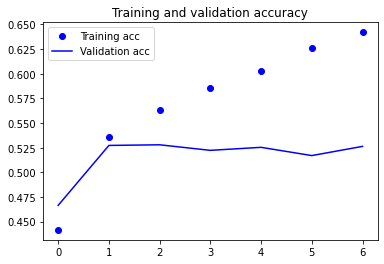

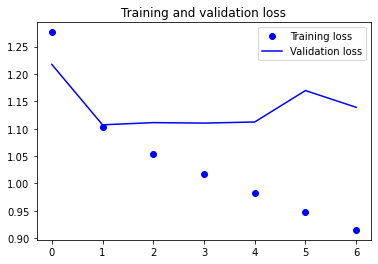

In [245]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Final Best GRU Model

In [34]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length)) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 70, 64)            960000    
                                                                 
 gru (GRU)                   (None, 70, 32)            9408      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 975,909
Trainable params: 975,909
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                       monitor='val_acc', patience=4, restore_best_weights=True)])

Epoch 1/20
778/778 [==============================] - 60s 72ms/step - loss: 1.2222 - acc: 0.4637 - val_loss: 1.1106 - val_acc: 0.5189
Epoch 2/20
778/778 [==============================] - 55s 70ms/step - loss: 1.0729 - acc: 0.5403 - val_loss: 1.0960 - val_acc: 0.5226
Epoch 3/20
778/778 [==============================] - 56s 72ms/step - loss: 1.0282 - acc: 0.5669 - val_loss: 1.0892 - val_acc: 0.5313
Epoch 4/20
778/778 [==============================] - 53s 68ms/step - loss: 0.9954 - acc: 0.5894 - val_loss: 1.0819 - val_acc: 0.5450
Epoch 5/20
778/778 [==============================] - 52s 67ms/step - loss: 0.9643 - acc: 0.6093 - val_loss: 1.1114 - val_acc: 0.5319
Epoch 6/20
778/778 [==============================] - 52s 67ms/step - loss: 0.9313 - acc: 0.6288 - val_loss: 1.1326 - val_acc: 0.5319
Epoch 7/20
778/778 [==============================] - 53s 68ms/step - loss: 0.8987 - acc: 0.6444 - val_loss: 1.1594 - val_acc: 0.5244
Epoch 8/20
778/778 [==============================] - 52s 67ms

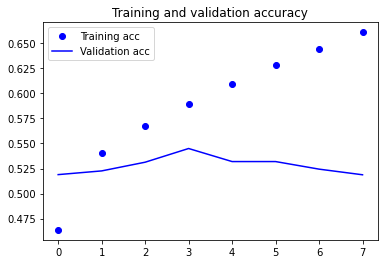

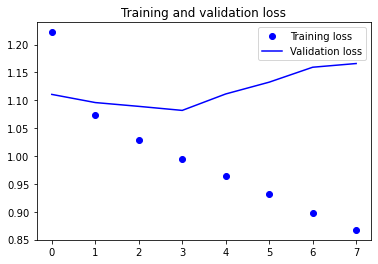

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [68]:
model.save('best_model_kc.h5')

In [67]:
sentence = np.array(["This app is amazing"])

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length,
                       padding=padding_type, truncating=trunc_type)
scores = model.predict(padded)
print(padded)
print(scores)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0  38   2  18 124]]
[[0.01527668 0.01483493 0.04510374 0.16151746 0.7632672 ]]


In [84]:
model.evaluate(X_test, y_test)

243/243 [==============================] - 5s 14ms/step - loss: 1.0924 - acc: 0.5347


[1.0924044847488403, 0.5346802473068237]

# Step 3 - Evaluate the Model using Testing Data (Individual & Group)

#### Exporting the Disney+ dataset into a csv file:

In [ ]:
disney_dataset = df[['content_final', 'score']]
disney_dataset.to_csv("disney_dataset.csv", index=False)

### 3.1 Standardizing the datasets

#### 1. Standardizing the Snapchat dataset

In [88]:
snapchat_dataset = pd.read_csv("snapchat_dataset.csv")
def strings(text):
    text = str(text)
    return text

snapchat_dataset['content_final'] = snapchat_dataset['content_final'].apply(lambda x:strings(x))
snapchat_dataset

content_final  score
0                                              best apps      0
1                                                    lag      0
2                                                  adnan      0
3      have install snapchat a day snapchat se 1 mess...      0
4                                        pic qwality low      0
...                                                  ...    ...
37922                                         muzmlekana      4
37923                                                 ok      4
37924                                        is nice app      4
37925                                             superb      4
37926                        nice app really good rate 5      4

[37927 rows x 2 columns]

In [89]:
# Param for tokenizing and padding

X_snapchat = snapchat_dataset['content_final']
y_snapchat = snapchat_dataset['score']


##training sequences and labels
snapchat_train_seqs = tokenizer.texts_to_sequences(snapchat_dataset['content_final'])
snapchat_train_padded = pad_sequences(snapchat_train_seqs, maxlen=max_length, truncating=trunc_type, padding = padding_type)
X_train_snapchat, X_test_snapchat, y_train_snapchat, y_test_snapchat = train_test_split(snapchat_train_padded, 
                                                                                        y_snapchat, test_size=0.2, 
                                                                                        random_state=42)

In [90]:
model = keras.models.load_model("best_model_kc.h5")
model.evaluate(X_test_snapchat, y_test_snapchat, batch_size=32)

238/238 [==============================] - 5s 15ms/step - loss: 2.3551 - acc: 0.3127


[2.3550846576690674, 0.31268125772476196]

#### 2. Standardizing the Temple Run dataset

In [69]:
templerun_dataset = pd.read_csv("templerun_dataset.csv")
def strings(text):
    text = str(text)
    return text

templerun_dataset['content_final'] = templerun_dataset['content_final'].apply(lambda x:strings(x))
templerun_dataset

content_final  score
0                        thanks      0
1                     good game      0
2                 is super game      0
3                     fing game      0
4       good morning baby girl       0
...                         ...    ...
37960                  ganesh o      4
37961      because is wonderful      4
37962       favorite game a kid      4
37963  best game ever milkyway       4
37964                      nice      4

[37965 rows x 2 columns]

In [71]:
# Param for tokenizing and padding

X_templerun = templerun_dataset['content_final']
y_templerun = templerun_dataset['score']


##training sequences and labels
templerun_train_seqs = tokenizer.texts_to_sequences(templerun_dataset['content_final'])
templerun_train_padded = pad_sequences(templerun_train_seqs, maxlen=max_length, truncating=trunc_type, padding = padding_type)
X_train_templerun, X_test_templerun, y_train_templerun, y_test_templerun = train_test_split(templerun_train_padded, y_templerun, test_size=0.2, random_state=42)

In [73]:
model = keras.models.load_model("best_model_kc.h5")
model.evaluate(X_test_templerun, y_test_templerun, batch_size=32)

238/238 [==============================] - 5s 14ms/step - loss: 2.7756 - acc: 0.2458


[2.775639057159424, 0.24575266242027283]

#### 3. Standardizing the Instagram dataset

In [75]:
insta_dataset = pd.read_csv("insta_dataset.csv")
def strings(text):
    text = str(text)
    return text

insta_dataset['content_final'] = insta_dataset['content_final'].apply(lambda x:strings(x))
insta_dataset

content_final  score
0      app not opening update many uninstalls install...      0
1                                               super ok      0
2      cant install instagram app have tried for past...      0
3                                 is time wasting app me      0
4      app not working sir plz fix cant open instagra...      0
...                                                  ...    ...
38207                                         happy life      4
38208                                           nice app      4
38209                        love insta revolvinghearts       4
38210              is vrey op aap please downlod try app      4
38211  please improve upload quality option android a...      4

[38212 rows x 2 columns]

In [76]:
# Param for tokenizing and padding

X_insta = insta_dataset['content_final']
y_insta = insta_dataset['score']


##training sequences and labels
insta_train_seqs = tokenizer.texts_to_sequences(insta_dataset['content_final'])
insta_train_padded = pad_sequences(insta_train_seqs, maxlen=max_length, truncating=trunc_type, padding = padding_type)
X_train_insta, X_test_insta, y_train_insta, y_test_insta = train_test_split(insta_train_padded, y_insta, test_size=0.2, random_state=42)

In [77]:
model = keras.models.load_model("best_model_kc.h5")
model.evaluate(X_test_insta, y_test_insta, batch_size=32)

239/239 [==============================] - 5s 14ms/step - loss: 2.2283 - acc: 0.3226


[2.2282519340515137, 0.32264816761016846]

#### 4. Standardizing the Facebook dataset

In [93]:
fb_dataset = pd.read_csv("facebook_dataset.csv")
def strings(text):
    text = str(text)
    return text

fb_dataset['content_final'] = fb_dataset['content_final'].apply(lambda x:strings(x))
fb_dataset

content_final  score
0                               is amazing      0
1                                     nice      0
2           facebook doch chkea crash lhot      0
3                      bjw ව ව ද ඹ ව ව w w      0
4      is app authentication code generate      0
...                                    ...    ...
39993                                 good      4
39994                            wusihclzh      4
39995                                 nice      4
39996                 excellent experience      4
39997            hairik zack star facebook      4

[39998 rows x 2 columns]

In [94]:
# Param for tokenizing and padding

X_fb = fb_dataset['content_final']
y_fb = fb_dataset['score']


##training sequences and labels
fb_train_seqs = tokenizer.texts_to_sequences(fb_dataset['content_final'])
fb_train_padded = pad_sequences(fb_train_seqs, maxlen=max_length, truncating=trunc_type, padding = padding_type)
X_train_fb, X_test_fb, y_train_fb, y_test_fb = train_test_split(fb_train_padded, y_fb, test_size=0.2, random_state=42)

In [95]:
model = keras.models.load_model("best_model_kc.h5")
model.evaluate(X_test_fb, y_test_fb, batch_size=32)

250/250 [==============================] - 9s 15ms/step - loss: 2.5458 - acc: 0.2834


[2.5457658767700195, 0.28337499499320984]

### 3.2 Evaluating the test accuracies for the Disney+ model across all 5 datasets

In [107]:
model = keras.models.load_model("best_model_kc.h5")

In [102]:
print("[Disney+ Model] Test accuracy of Facebook dataset: ")
model.evaluate(X_test_fb, y_test_fb)

[Disney+ Model] Test accuracy of Facebook dataset: 
250/250 [==============================] - 4s 14ms/step - loss: 2.5458 - acc: 0.2834


[2.5457658767700195, 0.28337499499320984]

In [103]:
print("[Disney+ Model] Test accuracy of Snapchat dataset: ")
model.evaluate(X_test_snapchat, y_test_snapchat)

[Disney+ Model] Test accuracy of Snapchat dataset: 
238/238 [==============================] - 5s 14ms/step - loss: 2.3551 - acc: 0.3127


[2.3550846576690674, 0.31268125772476196]

In [104]:
print("[Disney+ Model] Test accuracy of Instagram dataset: ")
model.evaluate(X_test_insta, y_test_insta)

[Disney+ Model] Test accuracy of Instagram dataset: 
239/239 [==============================] - 4s 16ms/step - loss: 2.2283 - acc: 0.3226


[2.2282519340515137, 0.32264816761016846]

In [105]:
print("[Disney+ Model] Test accuracy of Disney+ dataset: ")
model.evaluate(X_test, y_test)

[Disney+ Model] Test accuracy of Disney+ dataset: 
243/243 [==============================] - 5s 15ms/step - loss: 1.0924 - acc: 0.5347


[1.0924044847488403, 0.5346802473068237]

In [108]:
print("[Disney+ Model] Test accuracy of Temple Run dataset: ")
model.evaluate(X_test_templerun, y_test_templerun)

[Disney+ Model] Test accuracy of Temple Run dataset: 
238/238 [==============================] - 5s 15ms/step - loss: 2.7756 - acc: 0.2458


[2.775639057159424, 0.24575266242027283]

In [109]:
# Save the Best Model
model = keras.models.load_model("best_model_kc.h5")
model.save('text_model_best.h5'

## Step 4 – Use the Best Model to make prediction (Group)

In [110]:
best_model = keras.models.load_model('text_model_best.h5')

In [196]:
# takes the user input
text_input = np.array([input("Enter text: ")])

Enter text: Used to be good but not anymore. Terrible service


In [197]:
def convert_to_tensor(text):
    sequences = tokenizer.texts_to_sequences(text)
    text = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    return text

def predict(model, text):
    pred = model.predict(text)
    df = pd.DataFrame(pred, columns=['1', '2', '3', '4', '5'])
    result = np.argmax(pred) + 1
    return df, result

In [186]:
text = convert_to_tensor(text_input)
df, result = predict(best_model, text)
print(f"The prediction for {text_input} is : {result}")
df

The prediction for ['Great app with many cool features. Good job!'] is : 4


1         2         3        4         5
0  0.006591  0.026659  0.177308  0.70402  0.085422

In [191]:
text = convert_to_tensor(text_input)
df, result = predict(best_model, text)
print(f"The prediction for {text_input} is : {result}")
df

The prediction for ['This game is so fun'] is : 1


1         2         3         4         5
0  0.489373  0.259913  0.162976  0.041259  0.046479

In [193]:
text = convert_to_tensor(text_input)
df, result = predict(best_model, text)
print(f"The prediction for {text_input} is : {result}")
df

The prediction for ['Great variety of different shows'] is : 4


1         2         3         4         5
0  0.00046  0.003439  0.053696  0.835383  0.107023

In [195]:
text = convert_to_tensor(text_input)
df, result = predict(best_model, text)
print(f"The prediction for {text_input} is : {result}")
df

The prediction for ['Used to be good but not anymore. Terrible service'] is : 4


1         2         3         4        5
0  0.019144  0.053211  0.256257  0.611349  0.06004